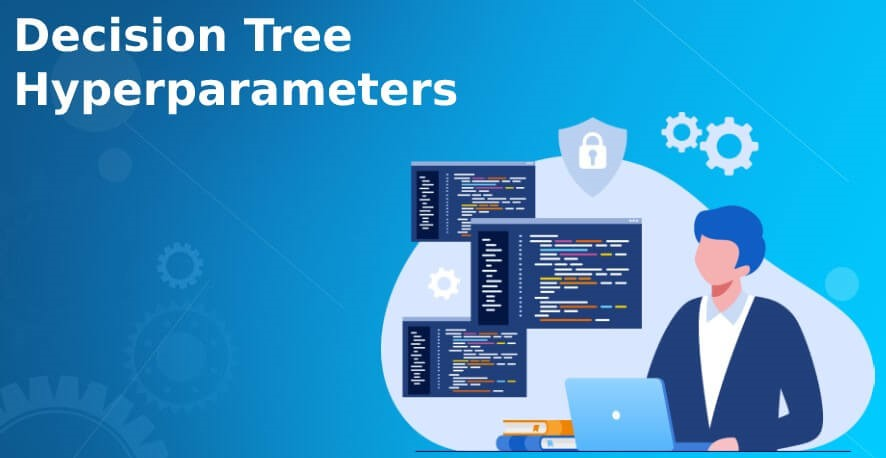

In [264]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Decision Tree Classifier

A decision tree classifier is a machine learning algorithm specifically designed for classification tasks. It constructs a tree-like model where each internal node represents a feature or condition, and each leaf node represents a predicted class label. The algorithm recursively selects the best feature to split the data based on criteria like Gini impurity or information gain, and creates child nodes accordingly. Decision trees for classification are known for their interpretability and ability to handle both numerical and categorical features. They can be used to predict discrete class labels for new, unseen instances based on the learned tree structure. While decision trees are prone to overfitting, techniques like pruning and setting constraints on tree depth or minimum samples per leaf can help mitigate this issue. In summary, decision tree classifiers are widely used and appreciated for their simplicity, interpretability, and effectiveness in classification tasks.

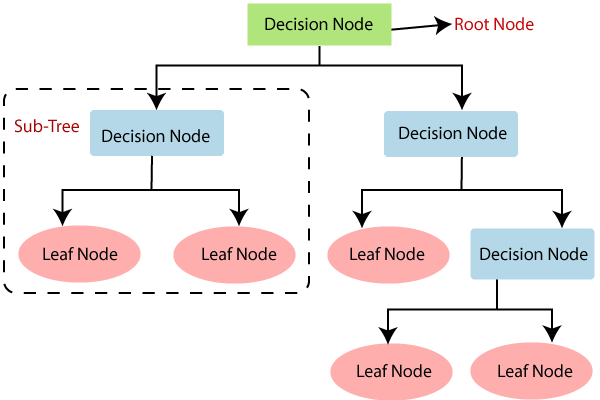

Why use Decision Trees?
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
The logic behind the decision tree can be easily understood because it shows a tree-like structure.
Decision Tree Terminologies
- Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
- Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
- Branch/Sub Tree: A tree formed by splitting the tree.
- Pruning: Pruning is the process of removing the unwanted branches from the tree.
- Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

### For More informaiton Vist My GitHub repo:
https://github.com/Trevino20/Scratch-ML

# 1.a)  Entropy and Information Gain
A decision tree classifier is a machine learning algorithm used for classification tasks. It constructs a tree-like model where each internal node represents a feature or condition, and each leaf node represents a predicted class label. The algorithm recursively selects the best feature to split the data and create child nodes. Decision trees are known for their interpretability and ability to handle both numerical and categorical features. They can be used to predict class labels for new instances based on the learned tree structure. While decision trees can be prone to overfitting, techniques like pruning and setting constraints can help address this issue. In summary, decision tree classifiers are popular for their simplicity, interpretability, and effectiveness in classification tasks.

#### What is Entropy? 
In the most layman terms, Entropy is nothing but the measure of disorder. or you can also call it the measure of purity and impurity.

#### How to calculate Entropy? 
Entropy measures the randomness or disorders in a system. In terms of data, we can define it as the randomness in the information we are processing. The higher the randomness, the higher the entropy. Hence, harder to conclude from that information. Mathematically, we calculate entropy as:

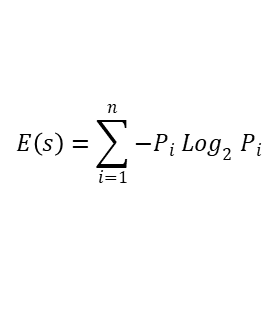
- P_i is simply the frequentist probability of an element in ower dataset.

#### For Example of "yes and no"
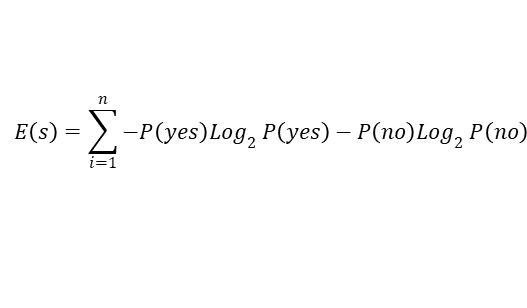
#### observations 
- more the uncertainty mean more entropy
- for a 2 class problem the min entropy is 0 and the max is 1
- for more than 2 classes problem the min entropy is 0 but the max can be greater than 1
- both log_2 and log_e used to calculate the entropy


#### Information Gain
Decision Tree is all about the finding attribute that returns the highest Information Gain.
Information gain (IG) measures the amount of information provided by a given feature or attribute about a particular target class. While creating a decision tree, our goal is to find the attribute having the highest Information Gain, and conversely, the lowest entropy. Mathematically, it is calculated as the difference of the initial and final entropy. For example:
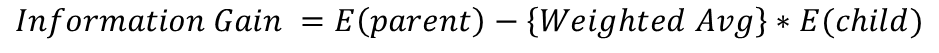

In [265]:
# Read Dataset
tennis = pd.read_csv("/kaggle/input/play-tennis/play_tennis.csv")

In [266]:
tennis.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [267]:
tennis.drop(['day'],axis=1,inplace=True)

In [268]:
tennis.shape

(14, 5)

In [269]:
 from sklearn.tree import DecisionTreeClassifier

In [270]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder ()
for i in tennis.columns:
    tennis[i] = encoder.fit_transform(tennis[i])

In [271]:
tennis.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [272]:
X= tennis.iloc[:,:4]
y= tennis.iloc[:,-1]

In [273]:
X.head()

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [274]:
tn = DecisionTreeClassifier(criterion="entropy")

In [275]:
tn.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

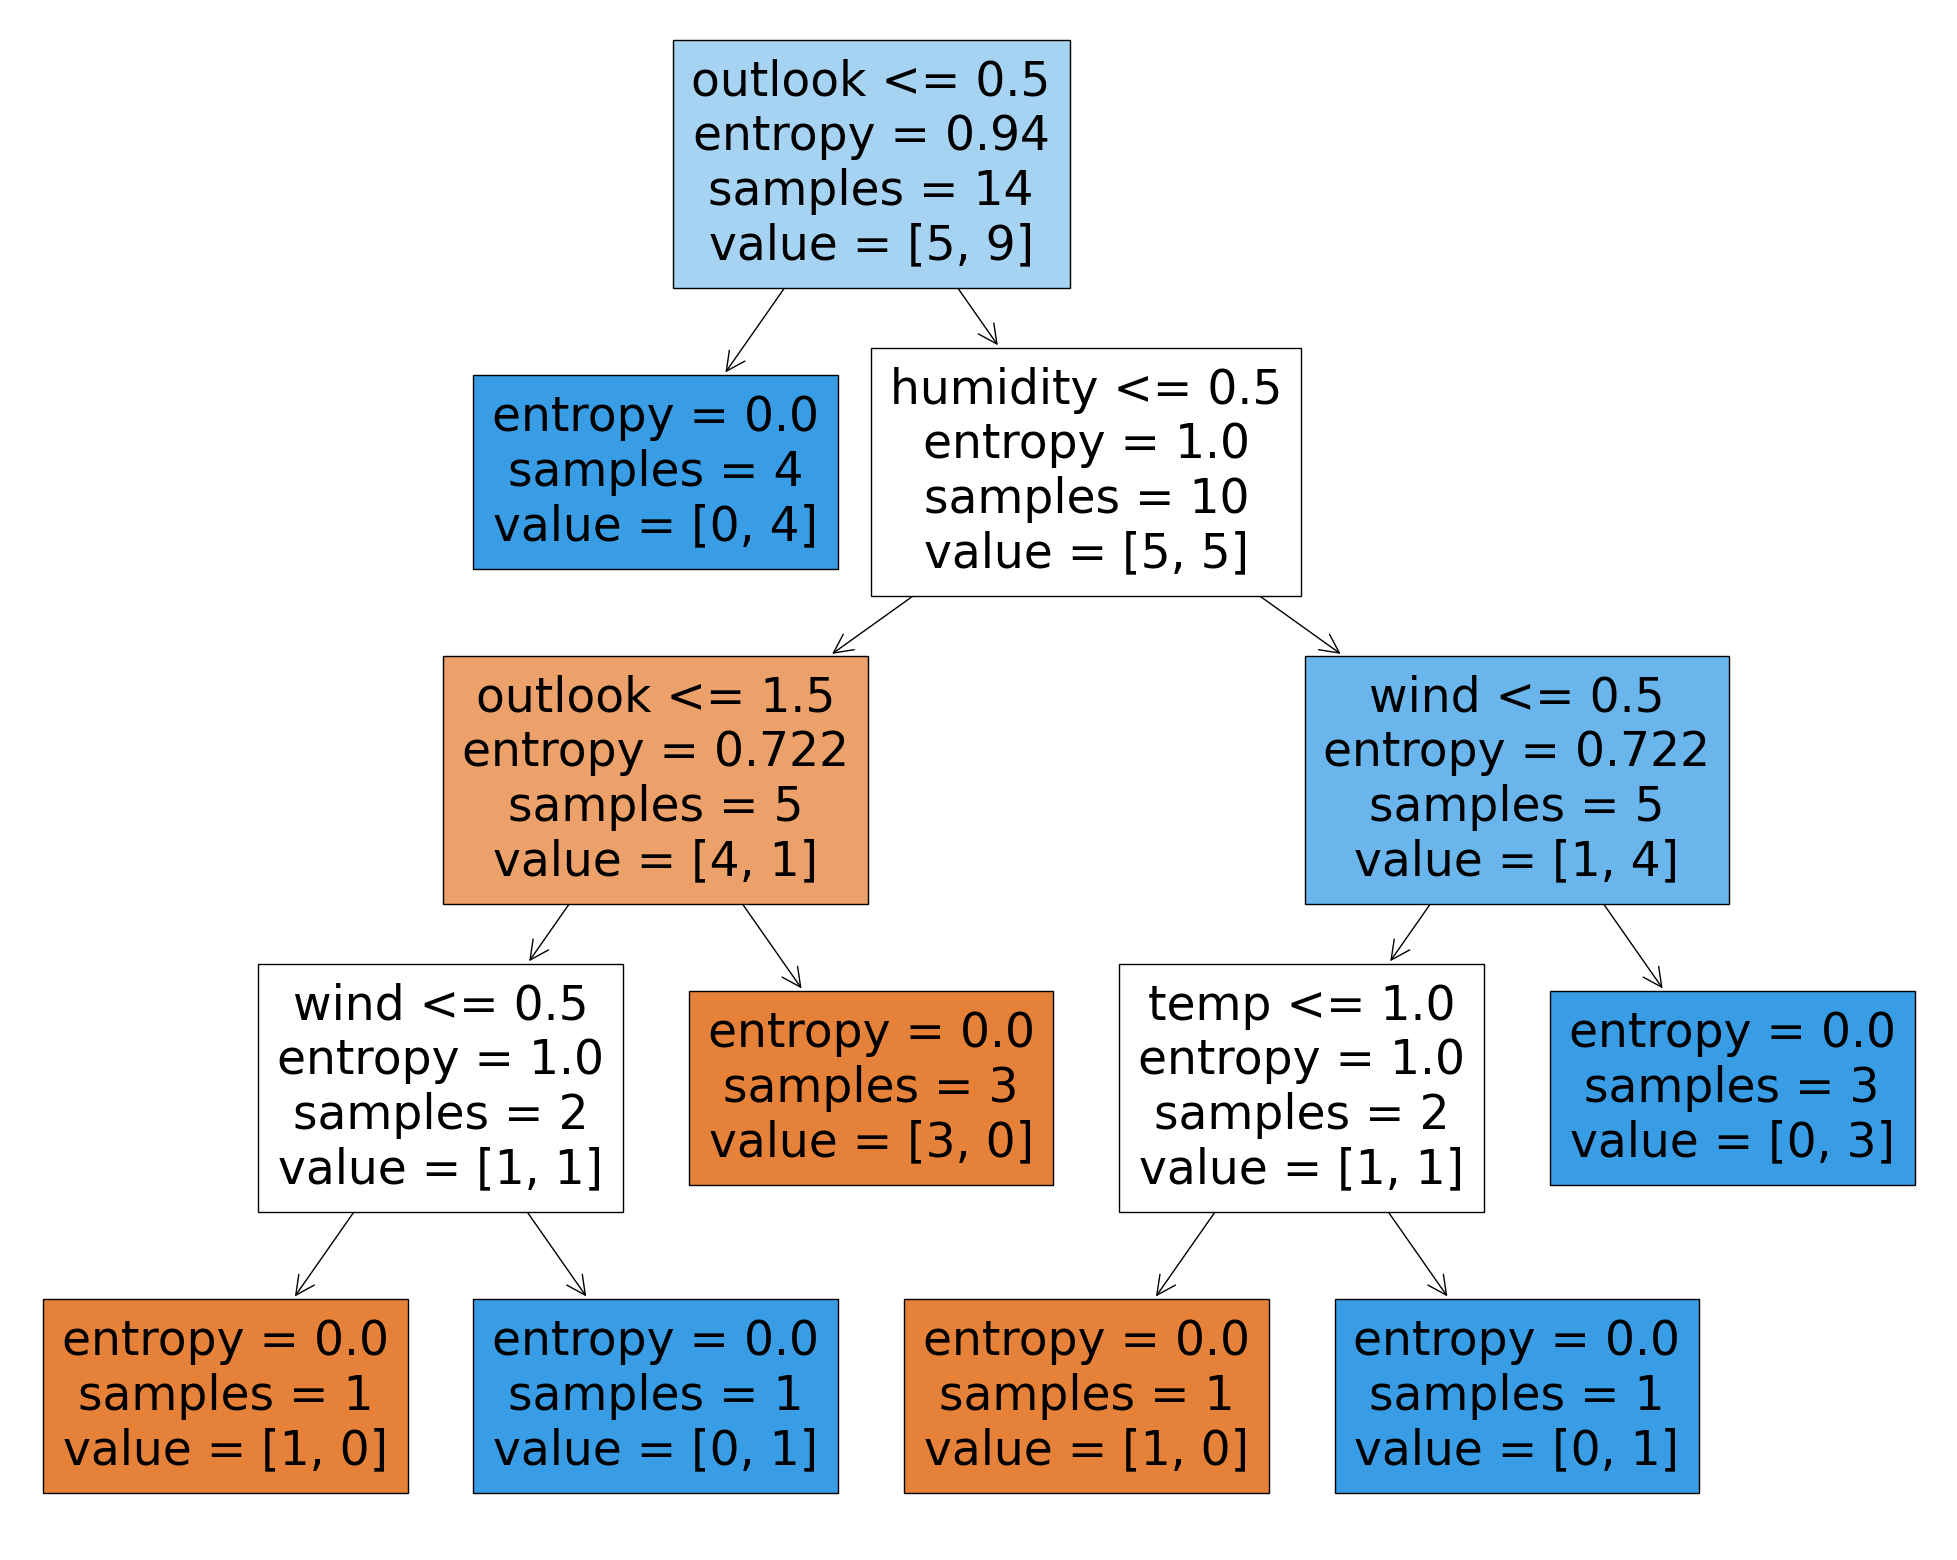

In [276]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tn,
                   feature_names=X.columns,
                   filled=True)

# 1. b) Gini

The Gini index, also known as the Gini coefficient, is a numerical measure of income or wealth inequality within a population. It quantifies the dispersion of income or wealth distribution among the members of that population.

The Gini index ranges from 0 to 1, where:

- 0 represents perfect income or wealth equality, indicating that every individual or household has the same income or wealth.
- 1 represents perfect income or wealth inequality, where one individual or household possesses all the income or wealth, and the rest have none.

In practice, Gini coefficients generally fall between 0.2 and 0.7, with higher values indicating higher levels of inequality. Countries with a Gini index closer to 0 are considered to have a more equitable distribution of income or wealth, while those closer to 1 exhibit greater disparities.

The Gini index is commonly used by economists, policymakers, and researchers to analyze and compare income or wealth inequality among different countries, regions, or social groups. It helps to identify areas where income disparities are most significant and can inform the design of targeted interventions to address inequality and foster economic inclusivity. Various data sources, such as household surveys and national income accounts, are used to calculate the Gini index for specific populations or nations.

Every Machine Learning model has a loss function or a cost function, whose objective is to minimize the cost, i.e., the tentative distance between the predicted value and actual value. (For classification problems, probabilities of predicted class are used). Gini Index is the cost/loss function that is used by decision trees to choose which feature will be used for splitting the data, and at what point the column should be split.

Lower Gini Score⟺Lower Cost⟺Good Split

⭐️ A perfect split with only two features and two classes has Gini Index = 0.

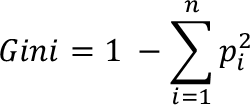

for Example yes and no
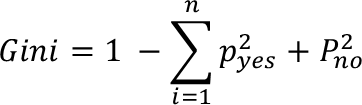

Gini weighted average is a modified version of the standard Gini index that considers the different sizes or contributions of subgroups. It provides a more accurate measure of income or wealth inequality across diverse populations. By accounting for population weights, it helps analyze disparities more comprehensively and guides targeted policy interventions for greater equity.

- weighted Average

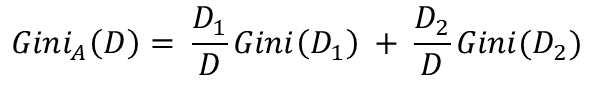

In [277]:
tn = DecisionTreeClassifier(criterion="gini")

In [278]:
tn.fit(X,y)

DecisionTreeClassifier()

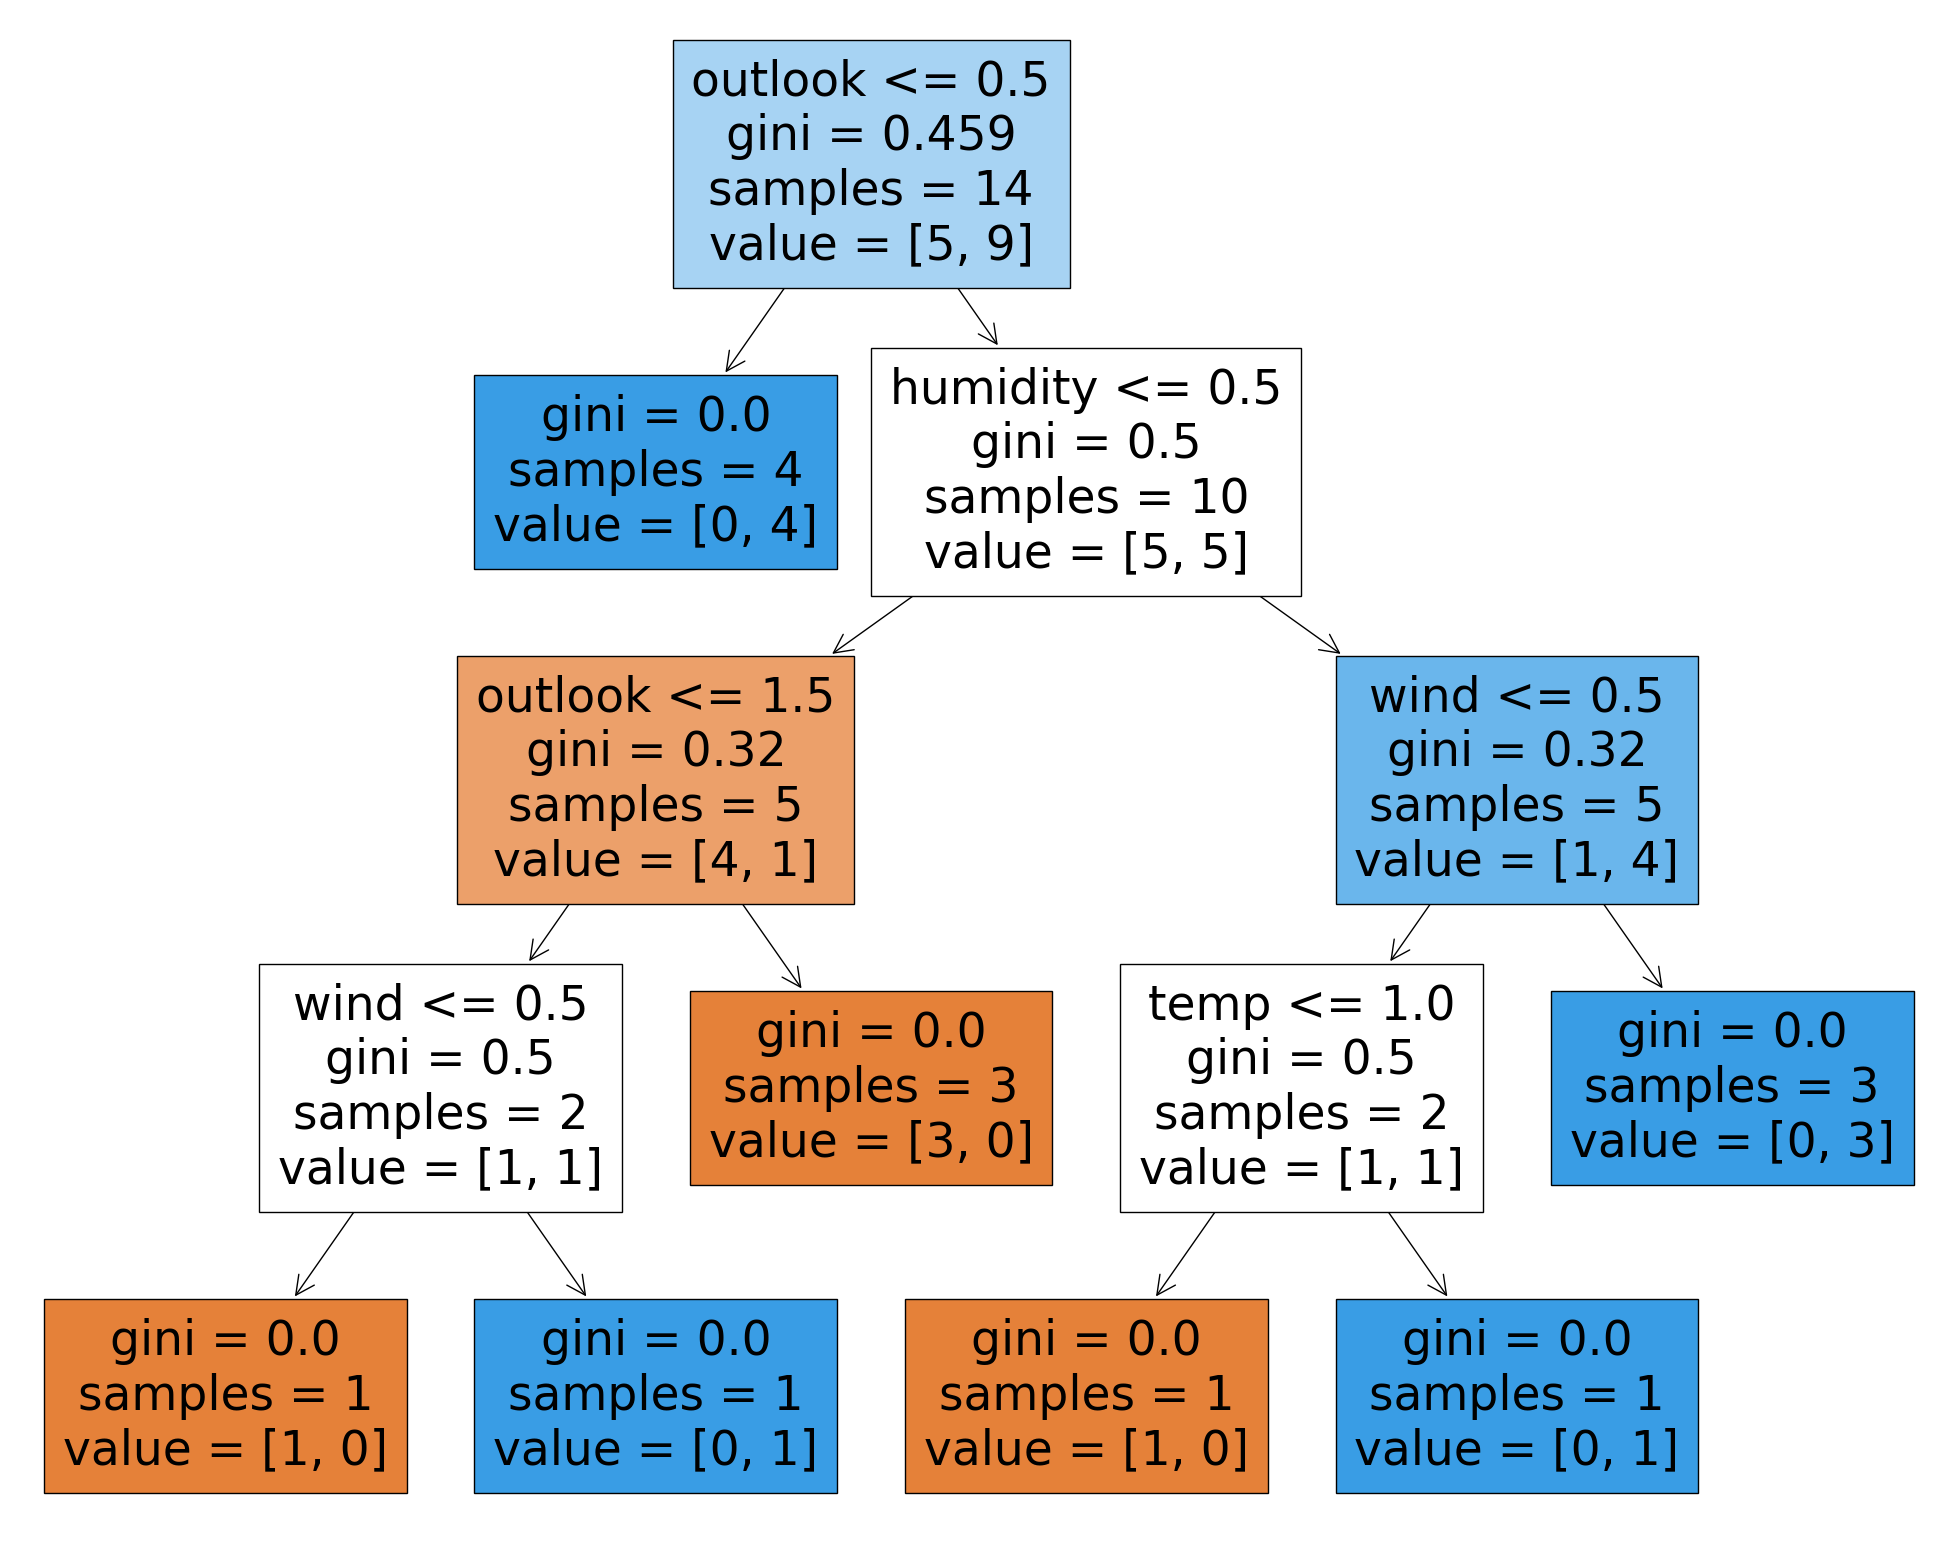

In [279]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tn,
                   feature_names=X.columns,
                   filled=True)

# 1.c) max_depth 

**max_depth** : int, default=None

**The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.**

In decision tree algorithms, the parameter "max_depth" controls the maximum depth or levels that the tree can grow during the training process. It determines the number of decision nodes or splits allowed in the tree before it stops dividing the data further.

In simpler terms, the "max_depth" parameter limits the complexity of the decision tree. A shallow tree with a low "max_depth" value represents a simple model, while a deeper tree with a higher "max_depth" value represents a more complex model.

A few key points about "max_depth":

1. **Underfitting and Overfitting:** Setting a very low "max_depth" can lead to underfitting, where the model may not capture the underlying patterns in the data. On the other hand, setting a very high "max_depth" can result in overfitting, where the model memorizes the training data but fails to generalize well to new, unseen data.

2. **Choosing the Right Value:** The optimal value for "max_depth" is often found through a process called hyperparameter tuning or cross-validation. It involves training and evaluating the model with different "max_depth" values to find the one that performs best on unseen data.

3. **Regularization:** Limiting the tree depth with "max_depth" is a form of regularization, which helps prevent overfitting and improves the model's ability to generalize to new data.

4. **Default Value:** In some decision tree implementations, the default value for "max_depth" may be set to unlimited (i.e., None or -1), meaning the tree can grow until it perfectly classifies the training data. However, it's crucial to set an appropriate value to control model complexity effectively.

Overall, setting the "max_depth" parameter appropriately is essential in decision tree algorithms to balance model complexity and accuracy, ultimately leading to better generalization and predictive performance on unseen data.

In [280]:
# Read heart Disease Data set
df = pd.read_csv("/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv")

In [281]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [282]:
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])

In [283]:
df = df[['Age','Sex','BP','Cholesterol','Heart Disease']]

In [284]:
df.head()

,Age,Sex,BP,Cholesterol,Heart Disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [285]:
df.shape

(270, 5)

In [286]:
# Putting feature variable to X
X = df.drop('Heart Disease',axis=1)

# Putting response variable to y
y = df['Heart Disease']

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [289]:
X_test.shape

(54, 4)

In [290]:
X_train.shape

(216, 4)

**Without setting any hyper-parameters**

In [291]:
from sklearn.tree import DecisionTreeClassifier

In [292]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

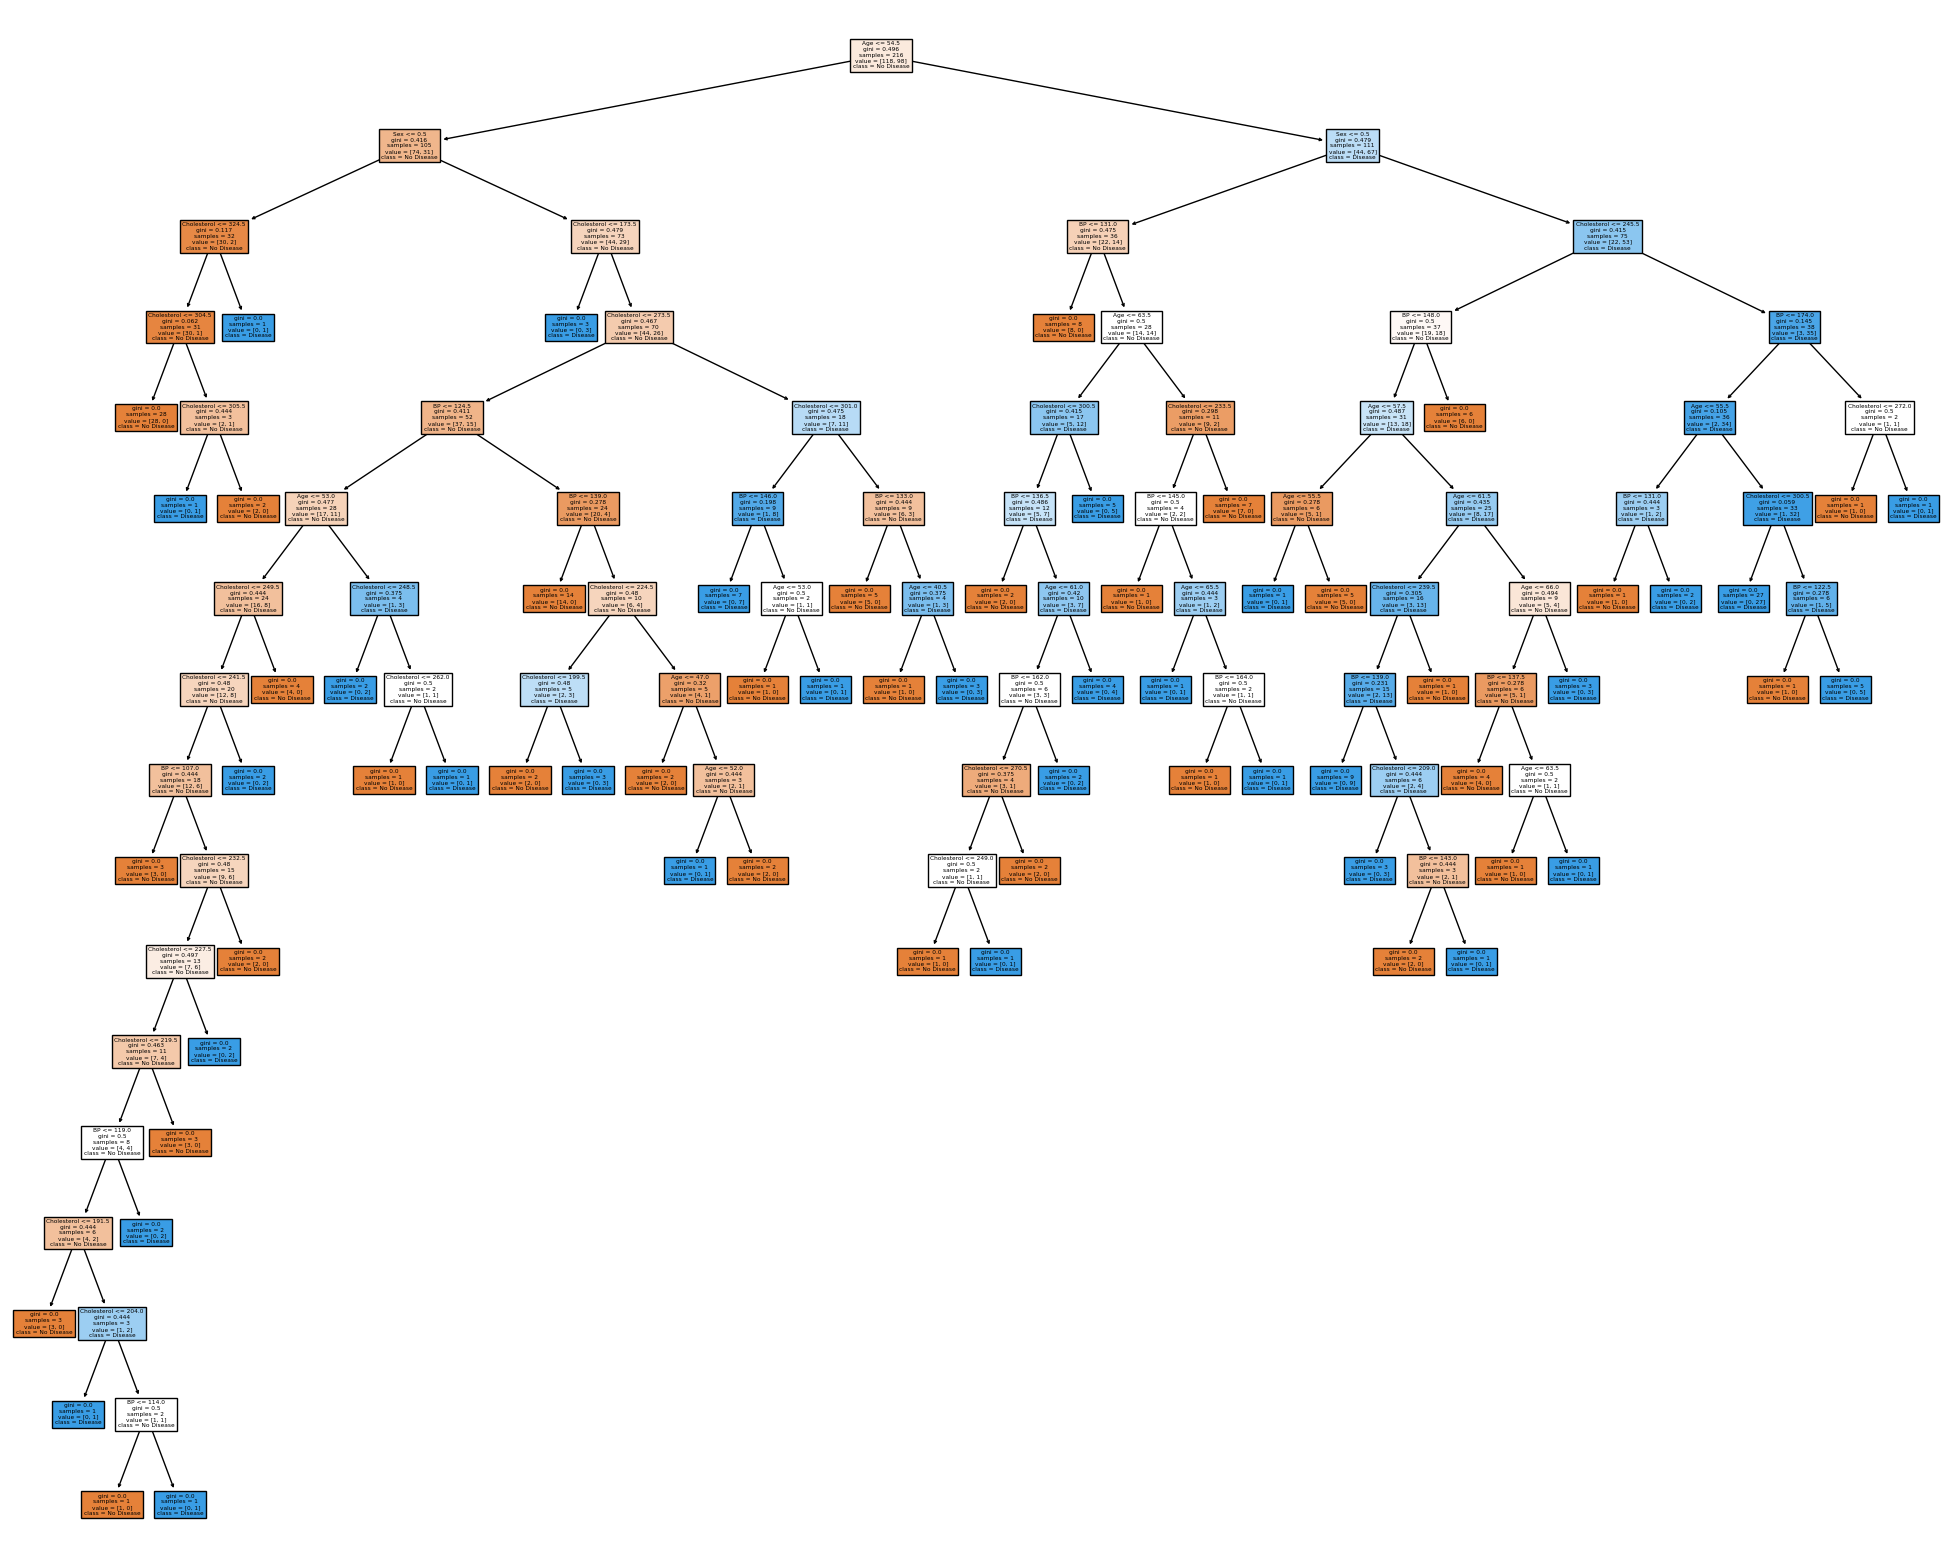

In [293]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

**Using max_depth hypperparameter**

In [294]:
dt = DecisionTreeClassifier(max_depth=3)

In [295]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

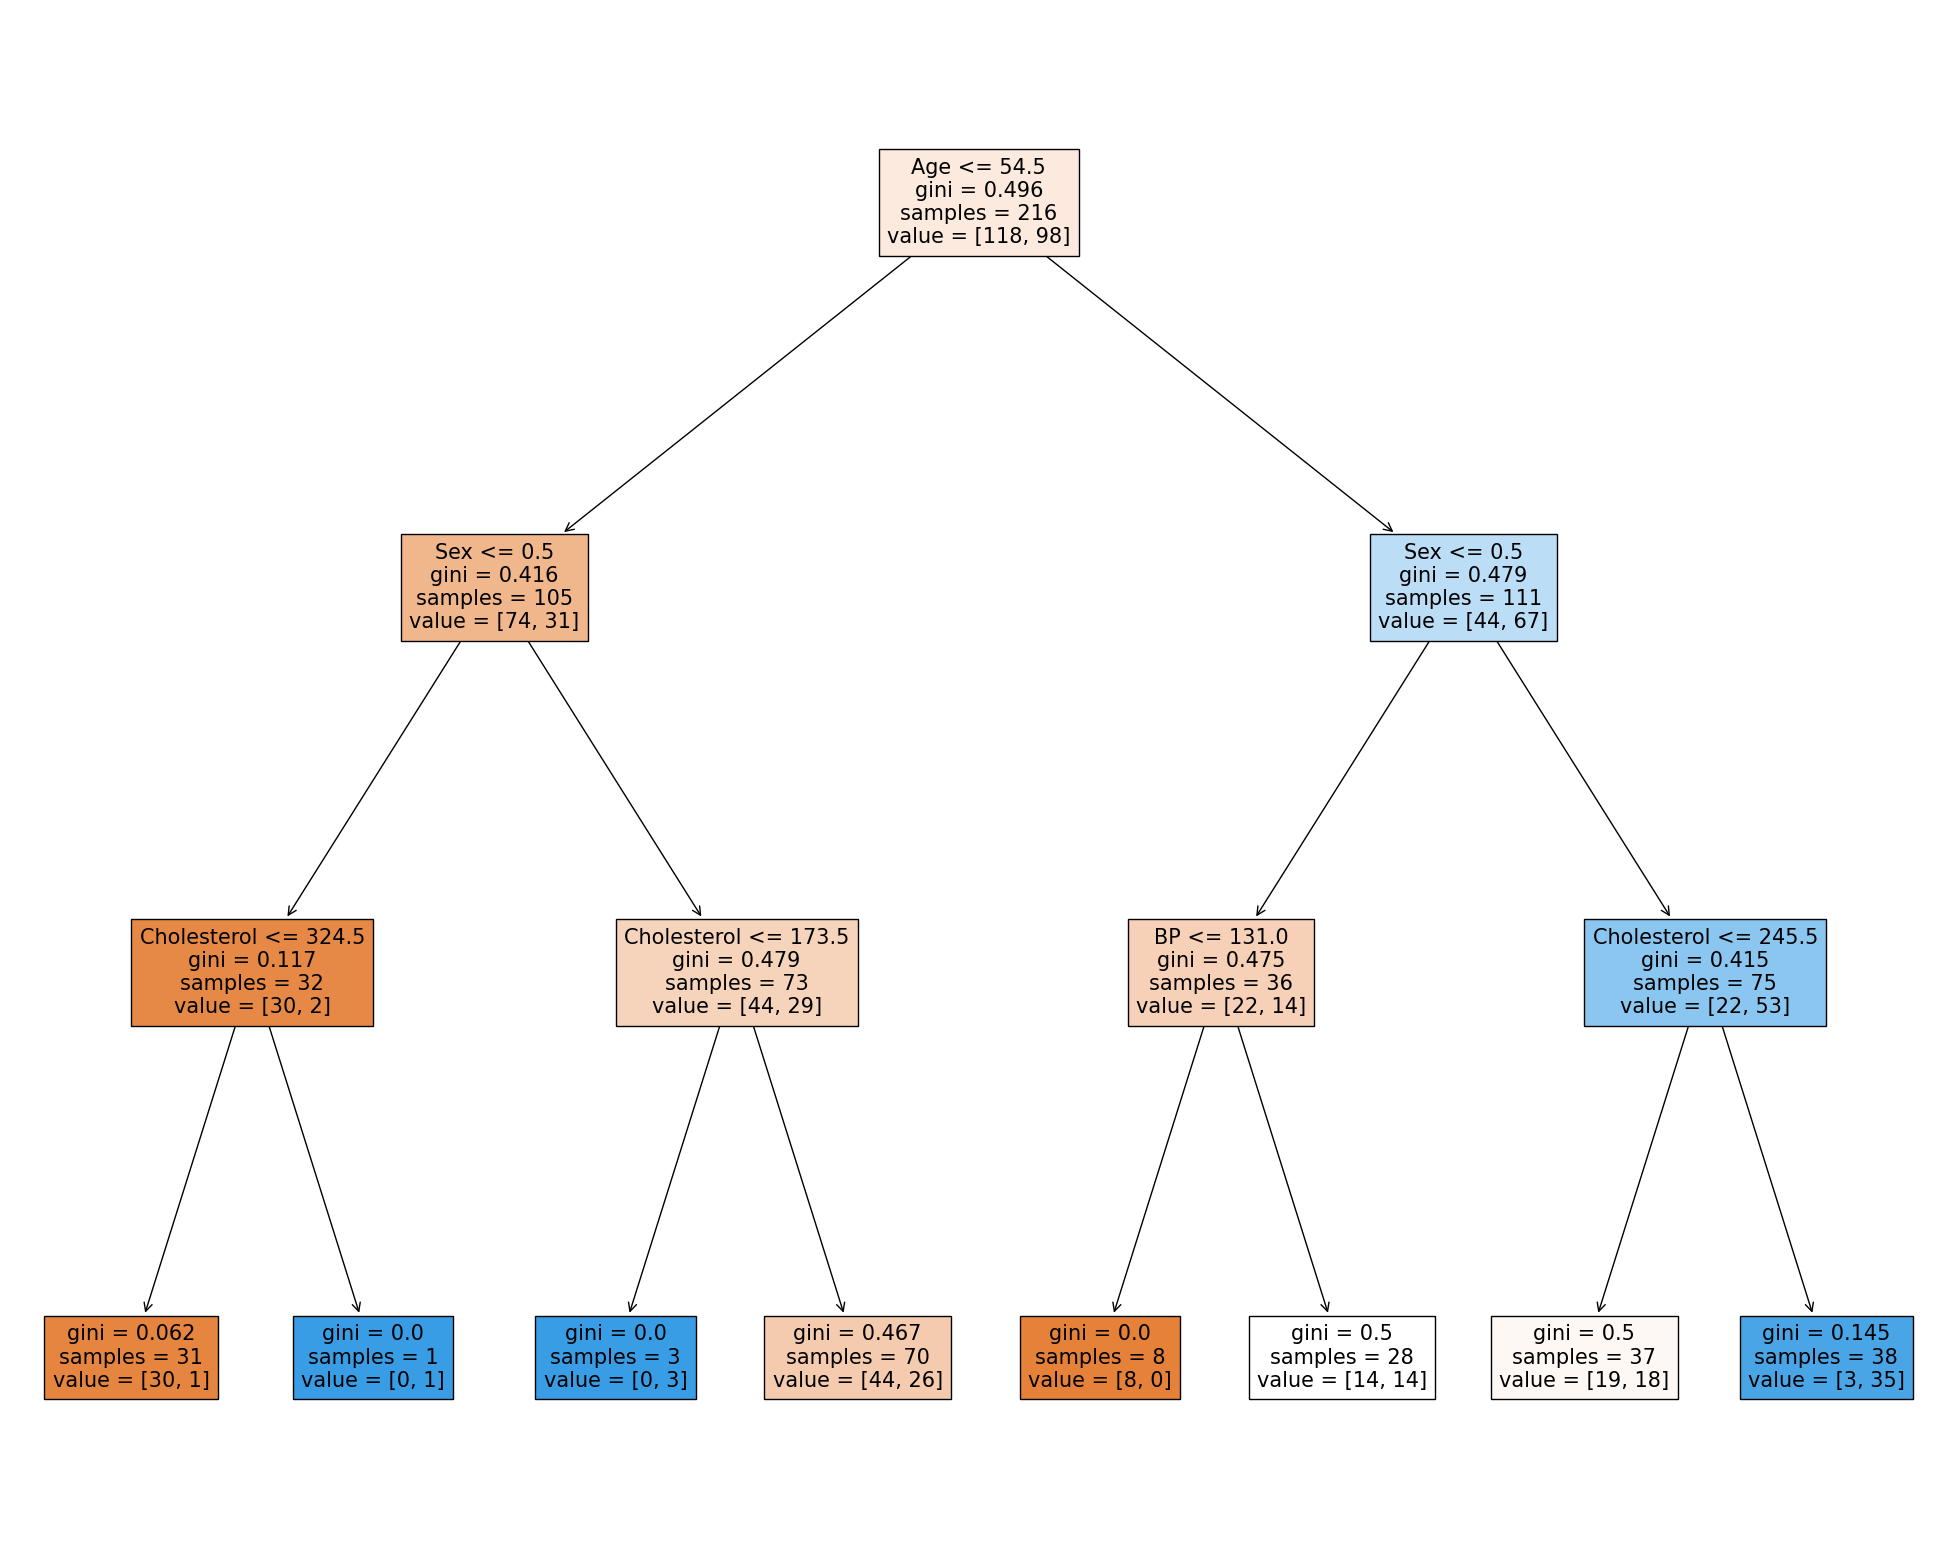

In [296]:
from sklearn import tree
flt = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                  feature_names=X.columns,
                   filled = True
                  )

# 1.d) min_samples_split

**min_samples_split** :int or float, default=2

The minimum number of samples required to split an internal node:

- If int, then consider min_samples_split as the minimum number.

- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

`min_samples_split` is a hyperparameter in decision trees that sets the minimum number of samples required to split a node. Higher values make the tree simpler, preventing overfitting. Default is 2, but it's often tuned for better performance.

In [297]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [298]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [299]:
iris.shape

(150, 6)

In [300]:
iris['Species'] = encoder.fit_transform(iris['Species'])

In [301]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [302]:
iris_x = iris.drop(['Species'],axis=1)

In [303]:
iris_x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [304]:
iris_y = iris['Species']

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

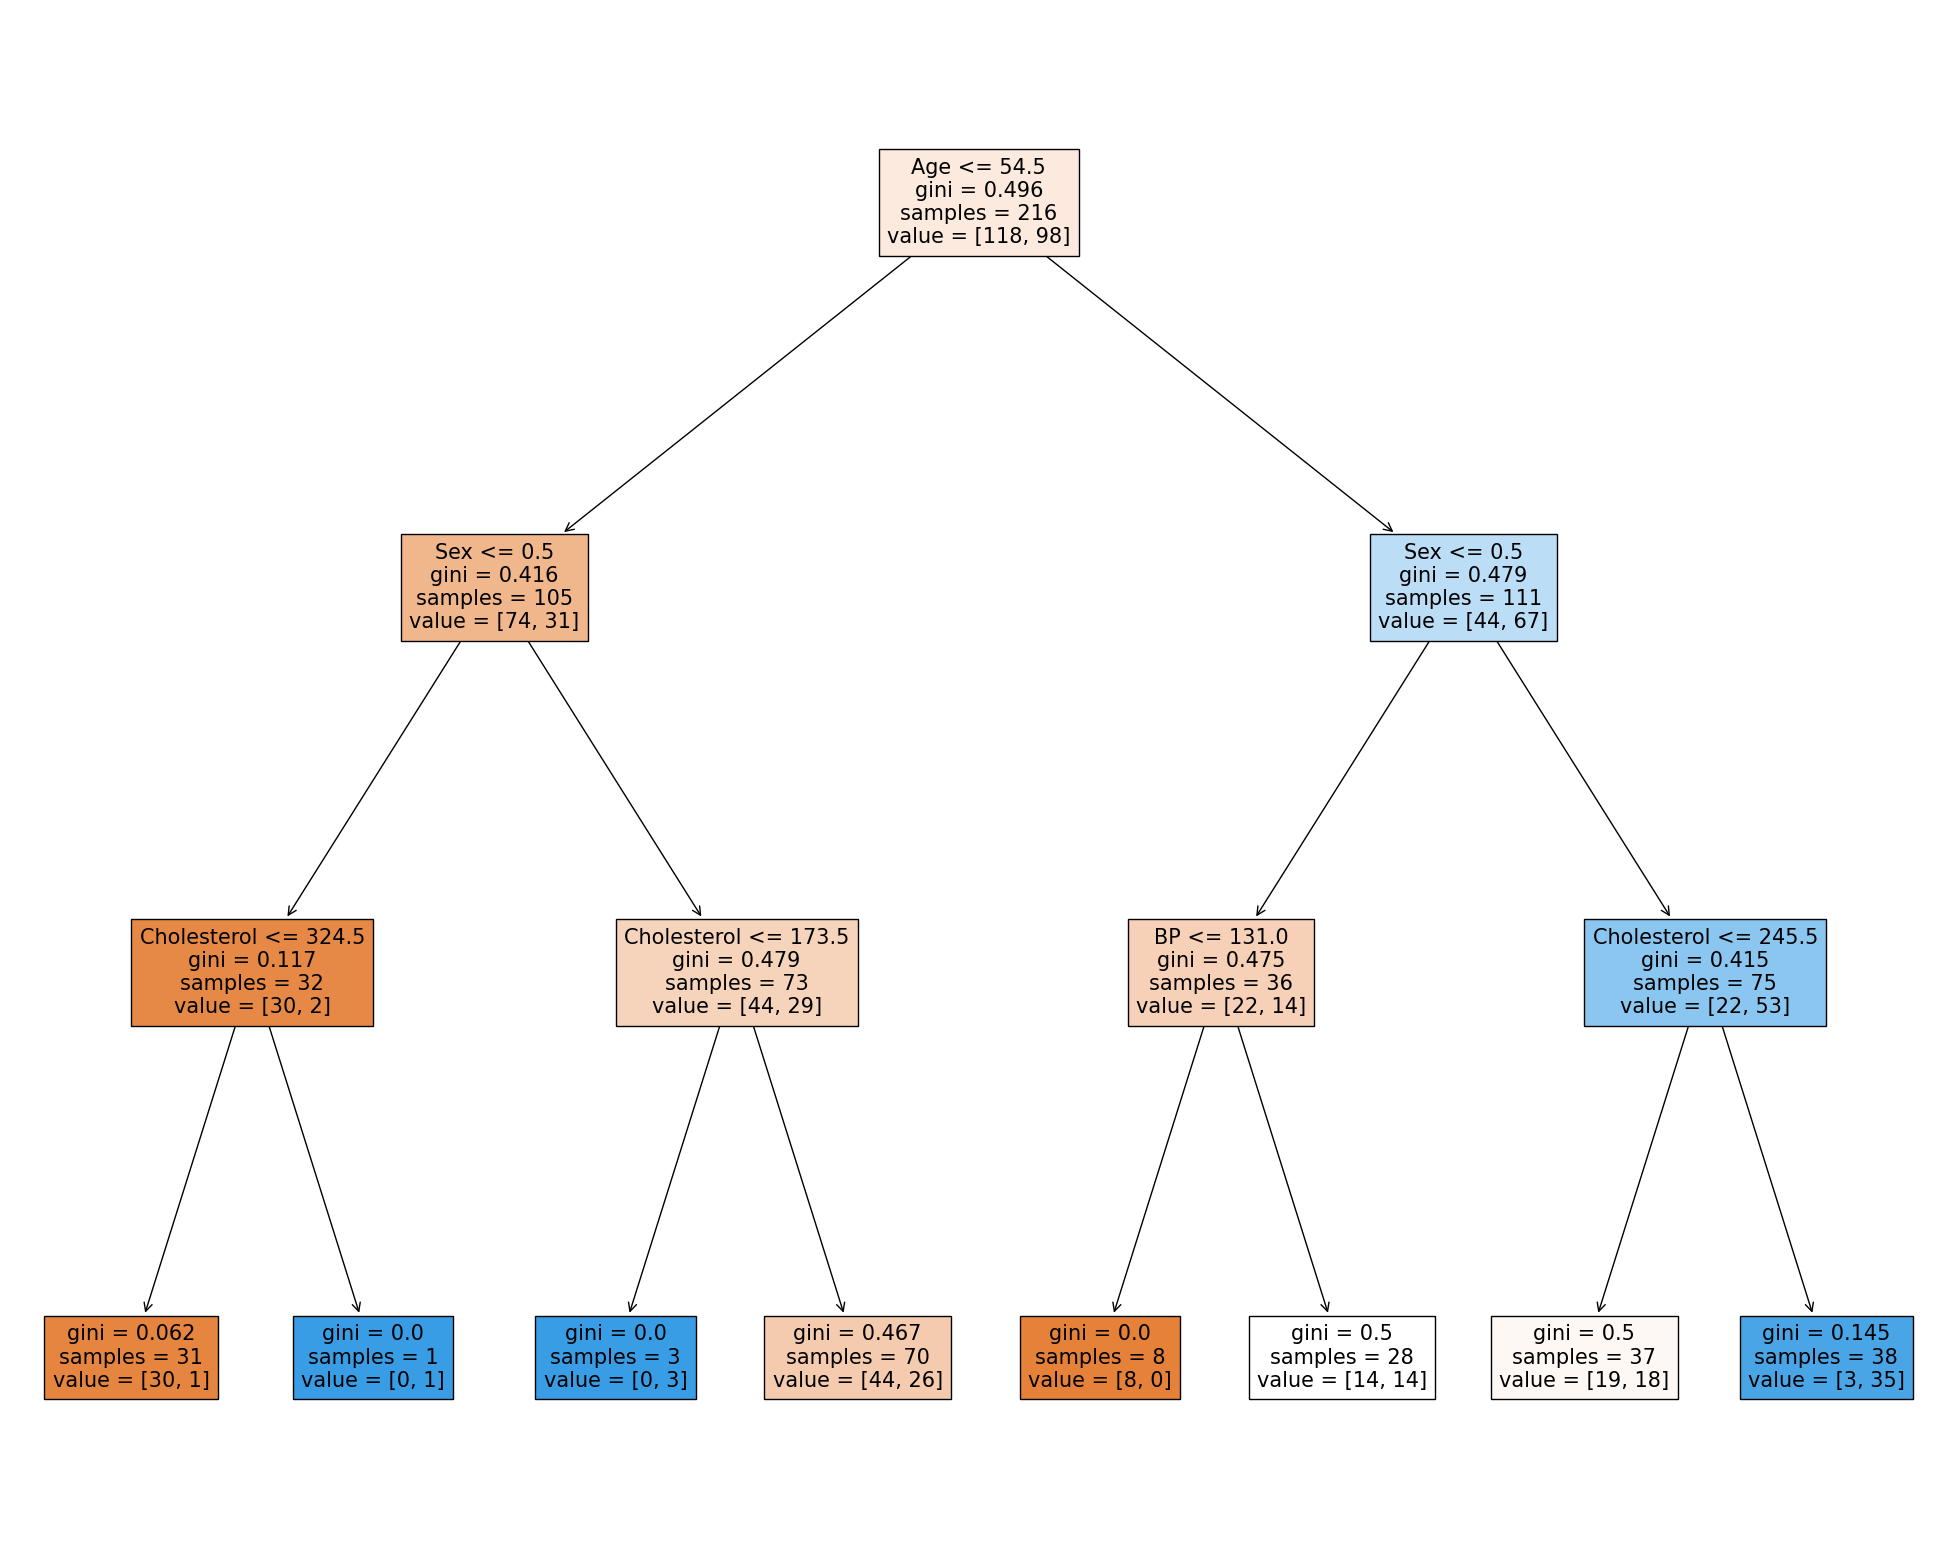

In [307]:
from sklearn import tree
flt = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                  feature_names=X.columns,
                   filled = True
                  )

# 1.e) min_samples_leaf

**min_samples_leaf**:int or float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- If int, then consider min_samples_leaf as the minimum number.

- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

`min_samples_leaf` is a hyperparameter in decision trees that sets the minimum number of samples required to be in a leaf (end node). It helps control the complexity of the tree and prevent overfitting. A higher value makes the tree simpler, and the default is usually 1. It's often tuned for better generalization.

In [308]:
from sklearn.tree import DecisionTreeClassifier

In [309]:
dt = DecisionTreeClassifier(min_samples_leaf=50)

In [310]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [311]:
dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 50,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Sex', 'BP', 'Cholesterol'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x790aa9737600>}

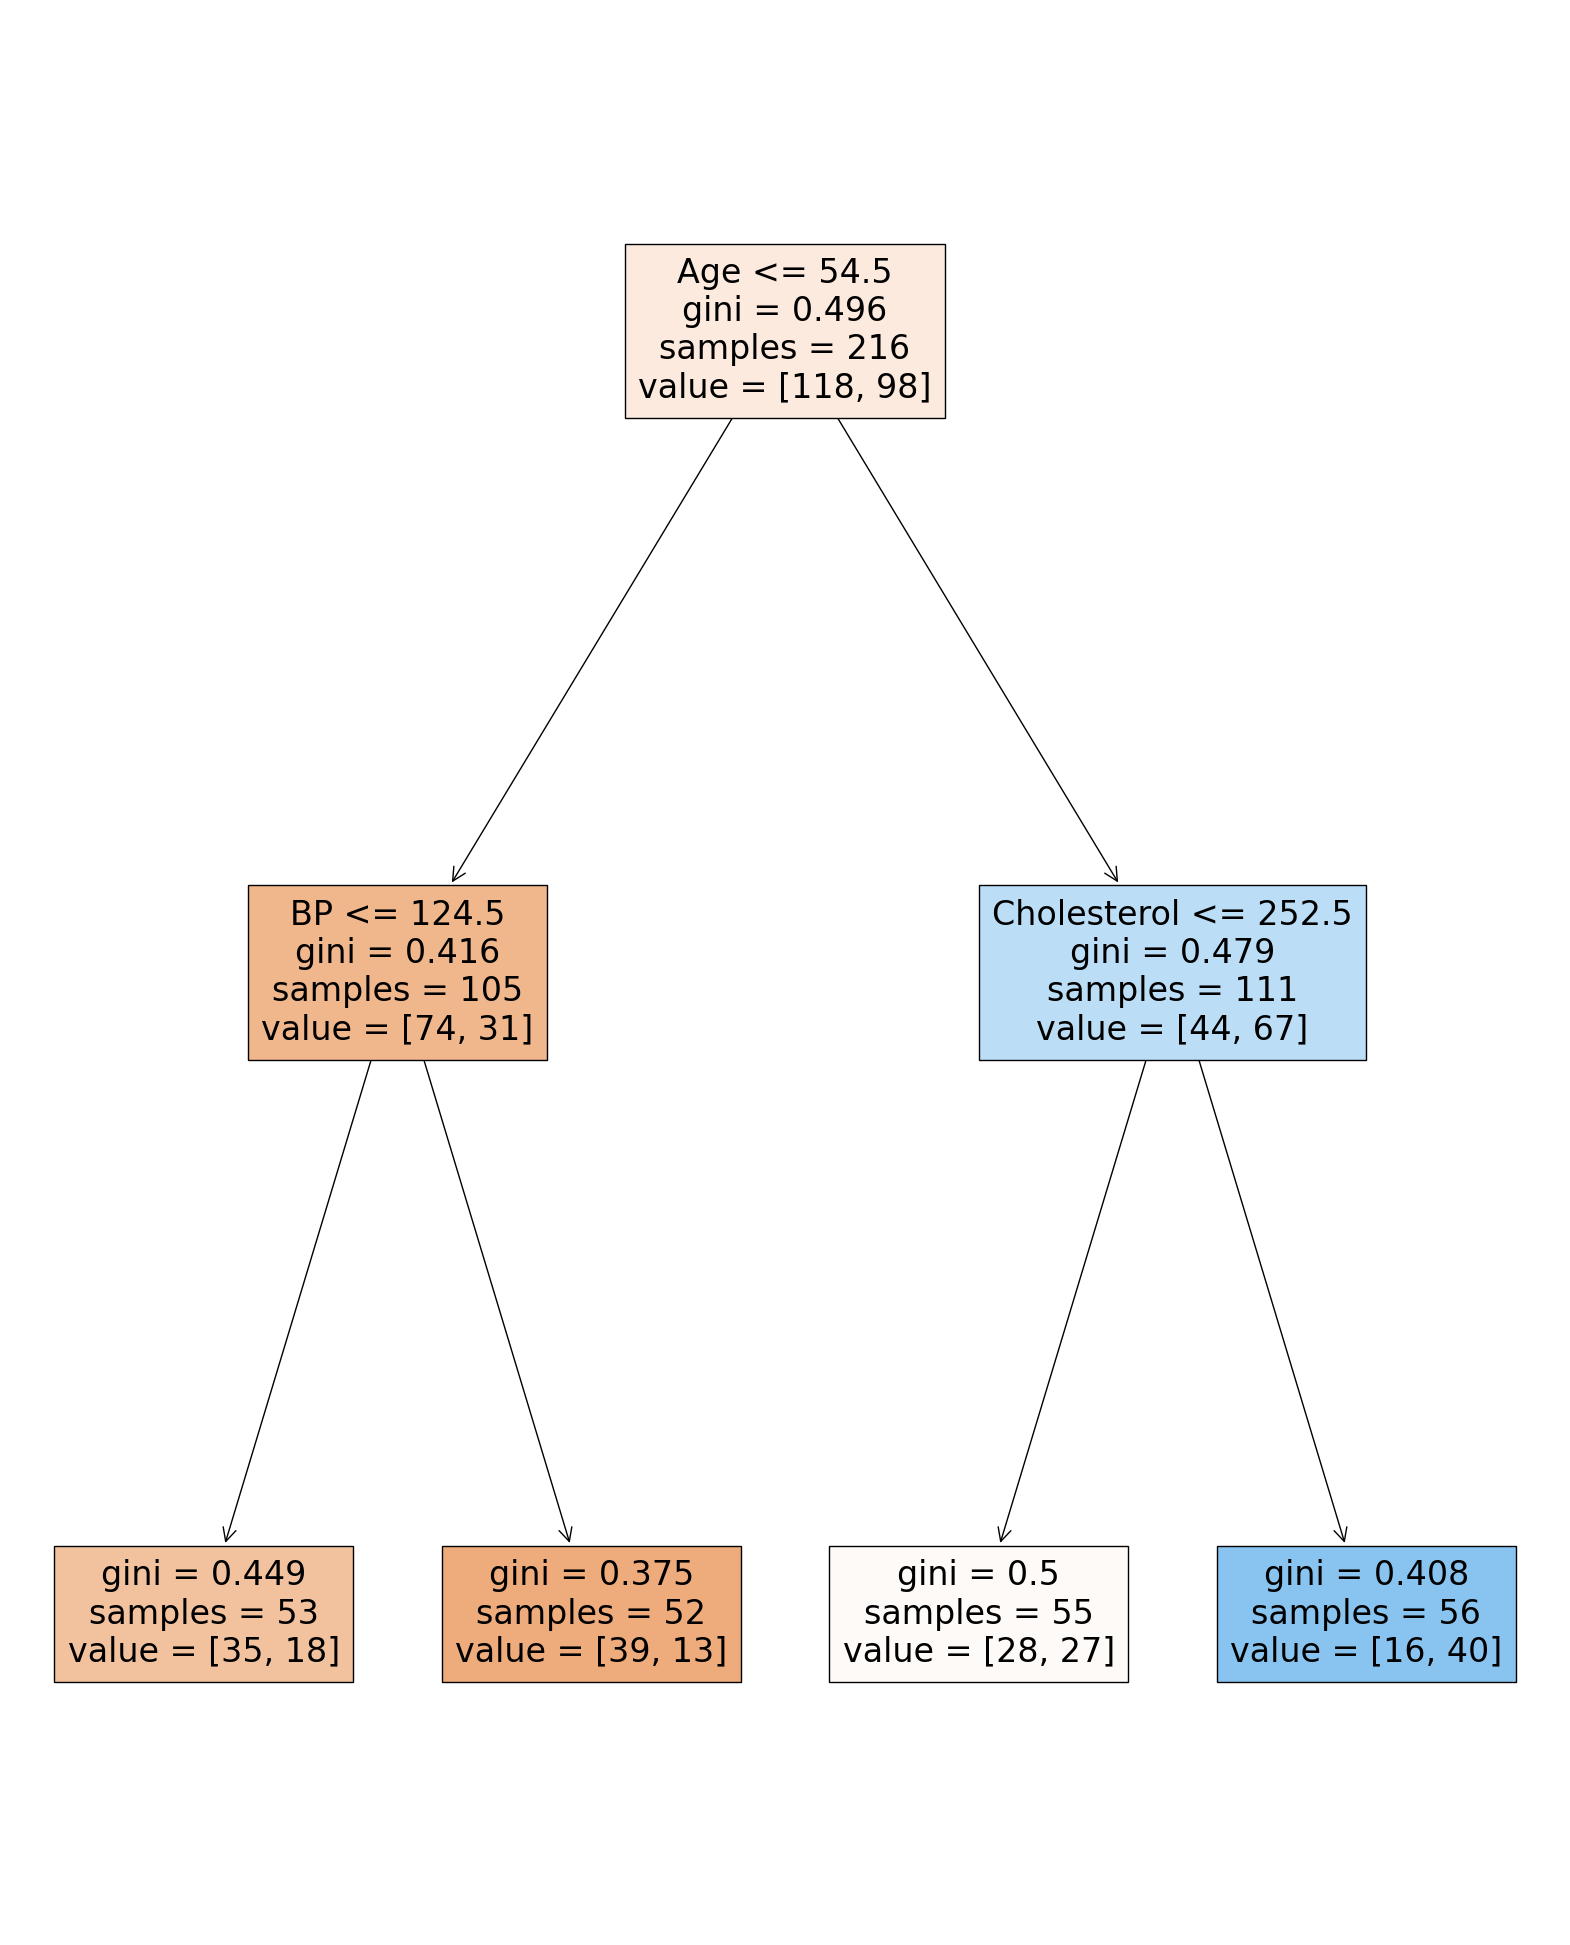

In [312]:
from sklearn import tree
fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(dt,
                  feature_names=X.columns,
                   filled = True
                  )

In [313]:
dl = DecisionTreeClassifier(min_samples_leaf=30)

In [314]:
dl.fit(iris_x,iris_y)

DecisionTreeClassifier(min_samples_leaf=30)

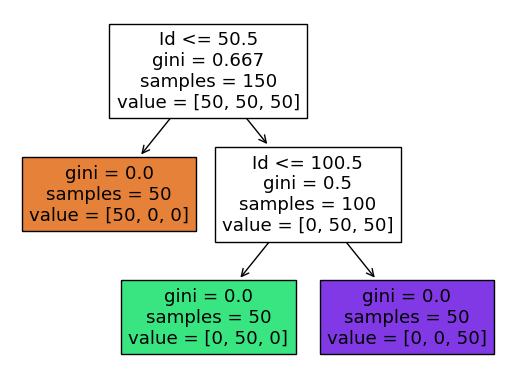

In [315]:
_ = tree.plot_tree(dl,
                  feature_names=iris_x.columns,
                   filled = True
                  )

# 1.f) max_features

**max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None

The number of features to consider when looking for the best split:

- If int, then consider max_features features at each split.

- If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.

- If “sqrt”, then max_features=sqrt(n_features).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

Instead of taking all the features into account for a split, we can circumscribe that only a few columns be selected.

Each time a split occurs, the model will only consider a fraction of columns. This will help to generalize our random forest model. If every time, all the features are considered at all splits, the random forest model will contain identical trees.

Hence, max_features will help make each tree in the forest different. The default value for this is “auto”, which is equivalent to the square root of the no. of features. Other values are: “log2”, “sqrt” and None. We got approximately the same results for all cases in our model.

In [316]:
dt = DecisionTreeClassifier(max_features=2)

In [317]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_features=2)

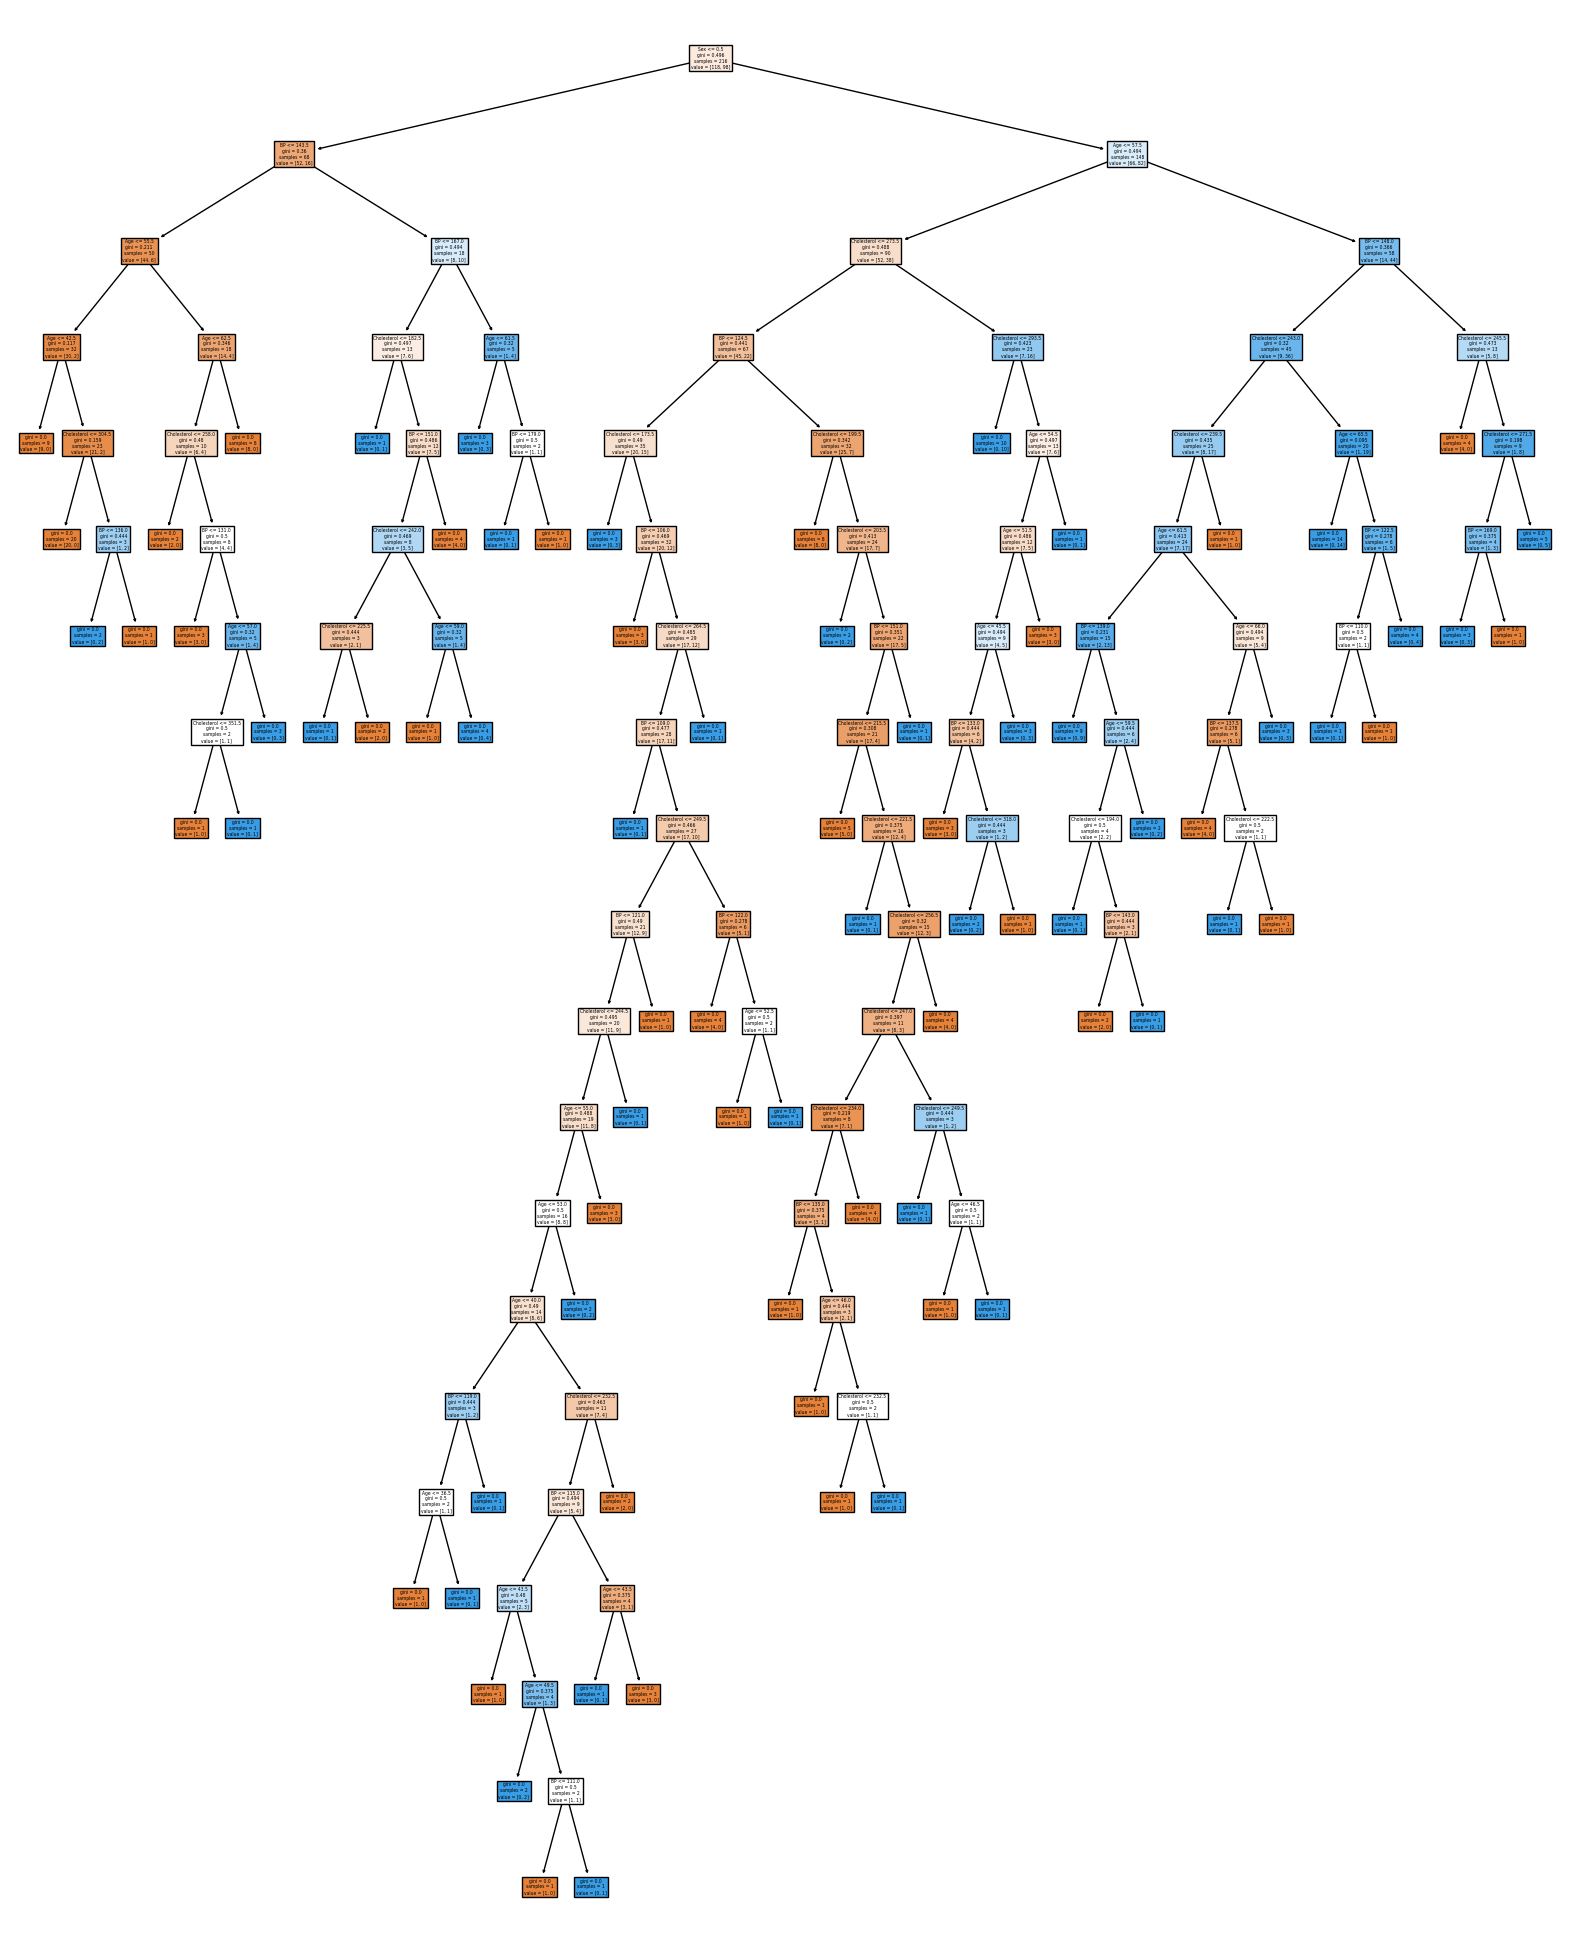

In [318]:
from sklearn import tree
fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(dt,
                  feature_names=X.columns,
                   filled = True
                  )

In [319]:
# function for plot tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [320]:
#function for check accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [321]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[118   0]
 [  0  98]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[23  9]
 [11 11]]


# 1.g) max_leaf_nodes

**max_leaf_nodes**:int, default=None

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

`max_leaf_nodes` is a hyperparameter in decision trees that limits the maximum number of leaf nodes allowed in the tree. Setting this parameter helps control the model's complexity and prevent overfitting. With a lower value, the tree becomes simpler, while a higher value allows for a more complex tree. The default value is typically None or unlimited, but specifying a maximum number is a common practice to improve the tree's generalization and performance.

In [322]:
dt = DecisionTreeClassifier(max_leaf_nodes=5)

In [323]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

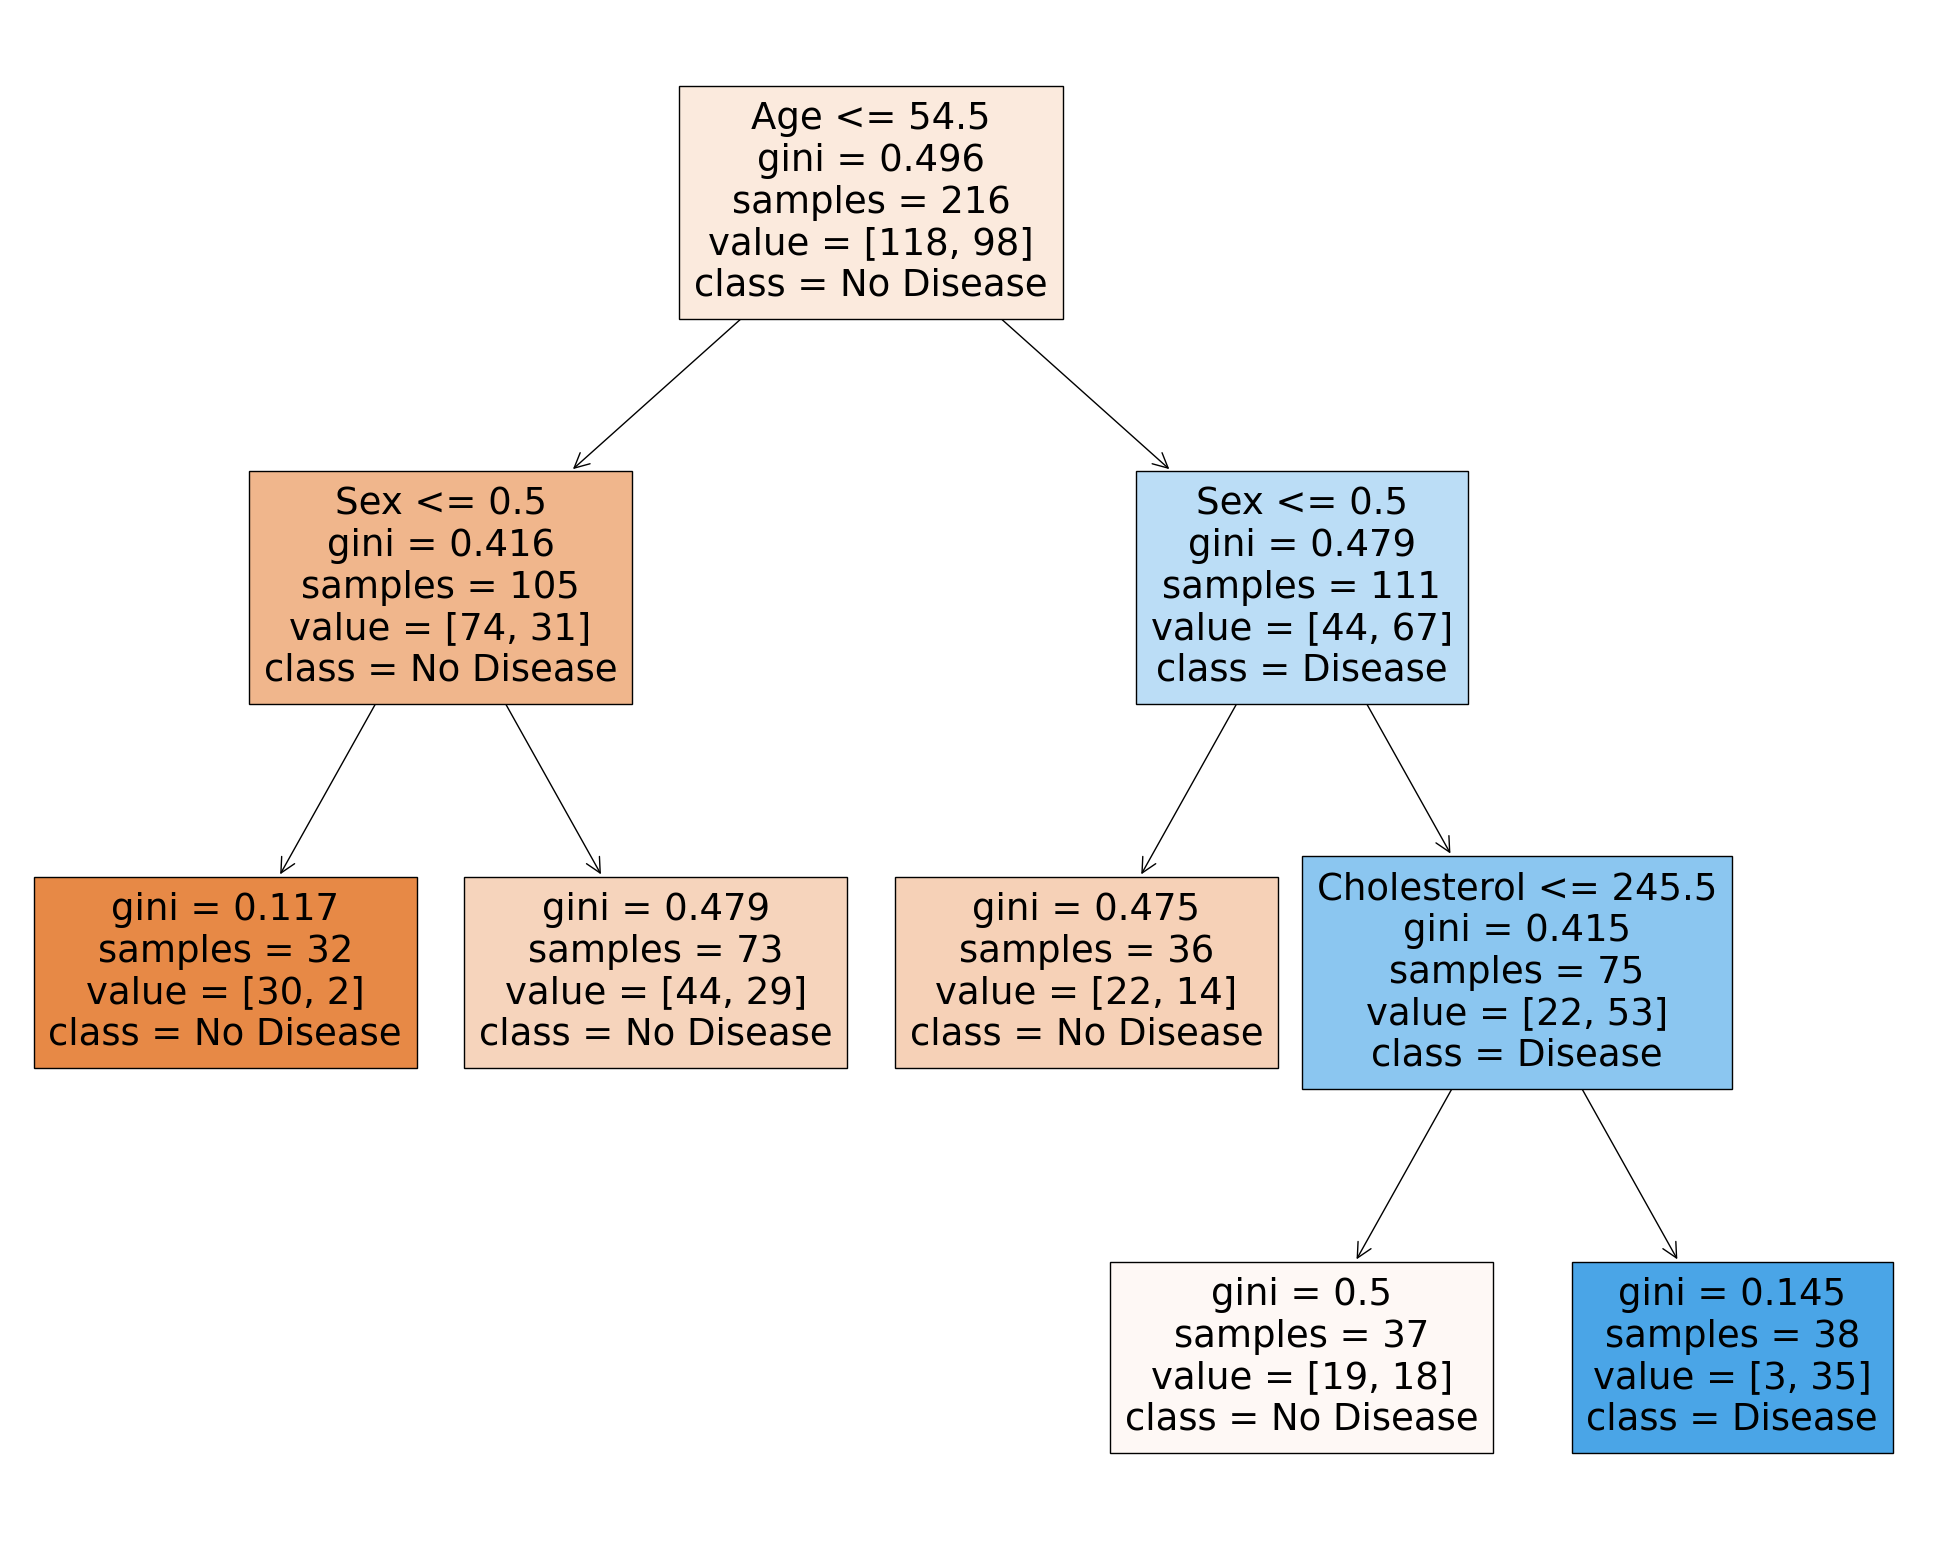

In [324]:
gph = get_dt_graph(dt)

# 1.h) random_state

**random_state**: int, RandomState instance or None, default=None

Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

In [325]:
dt = DecisionTreeClassifier(random_state=10,max_depth=3)

In [326]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

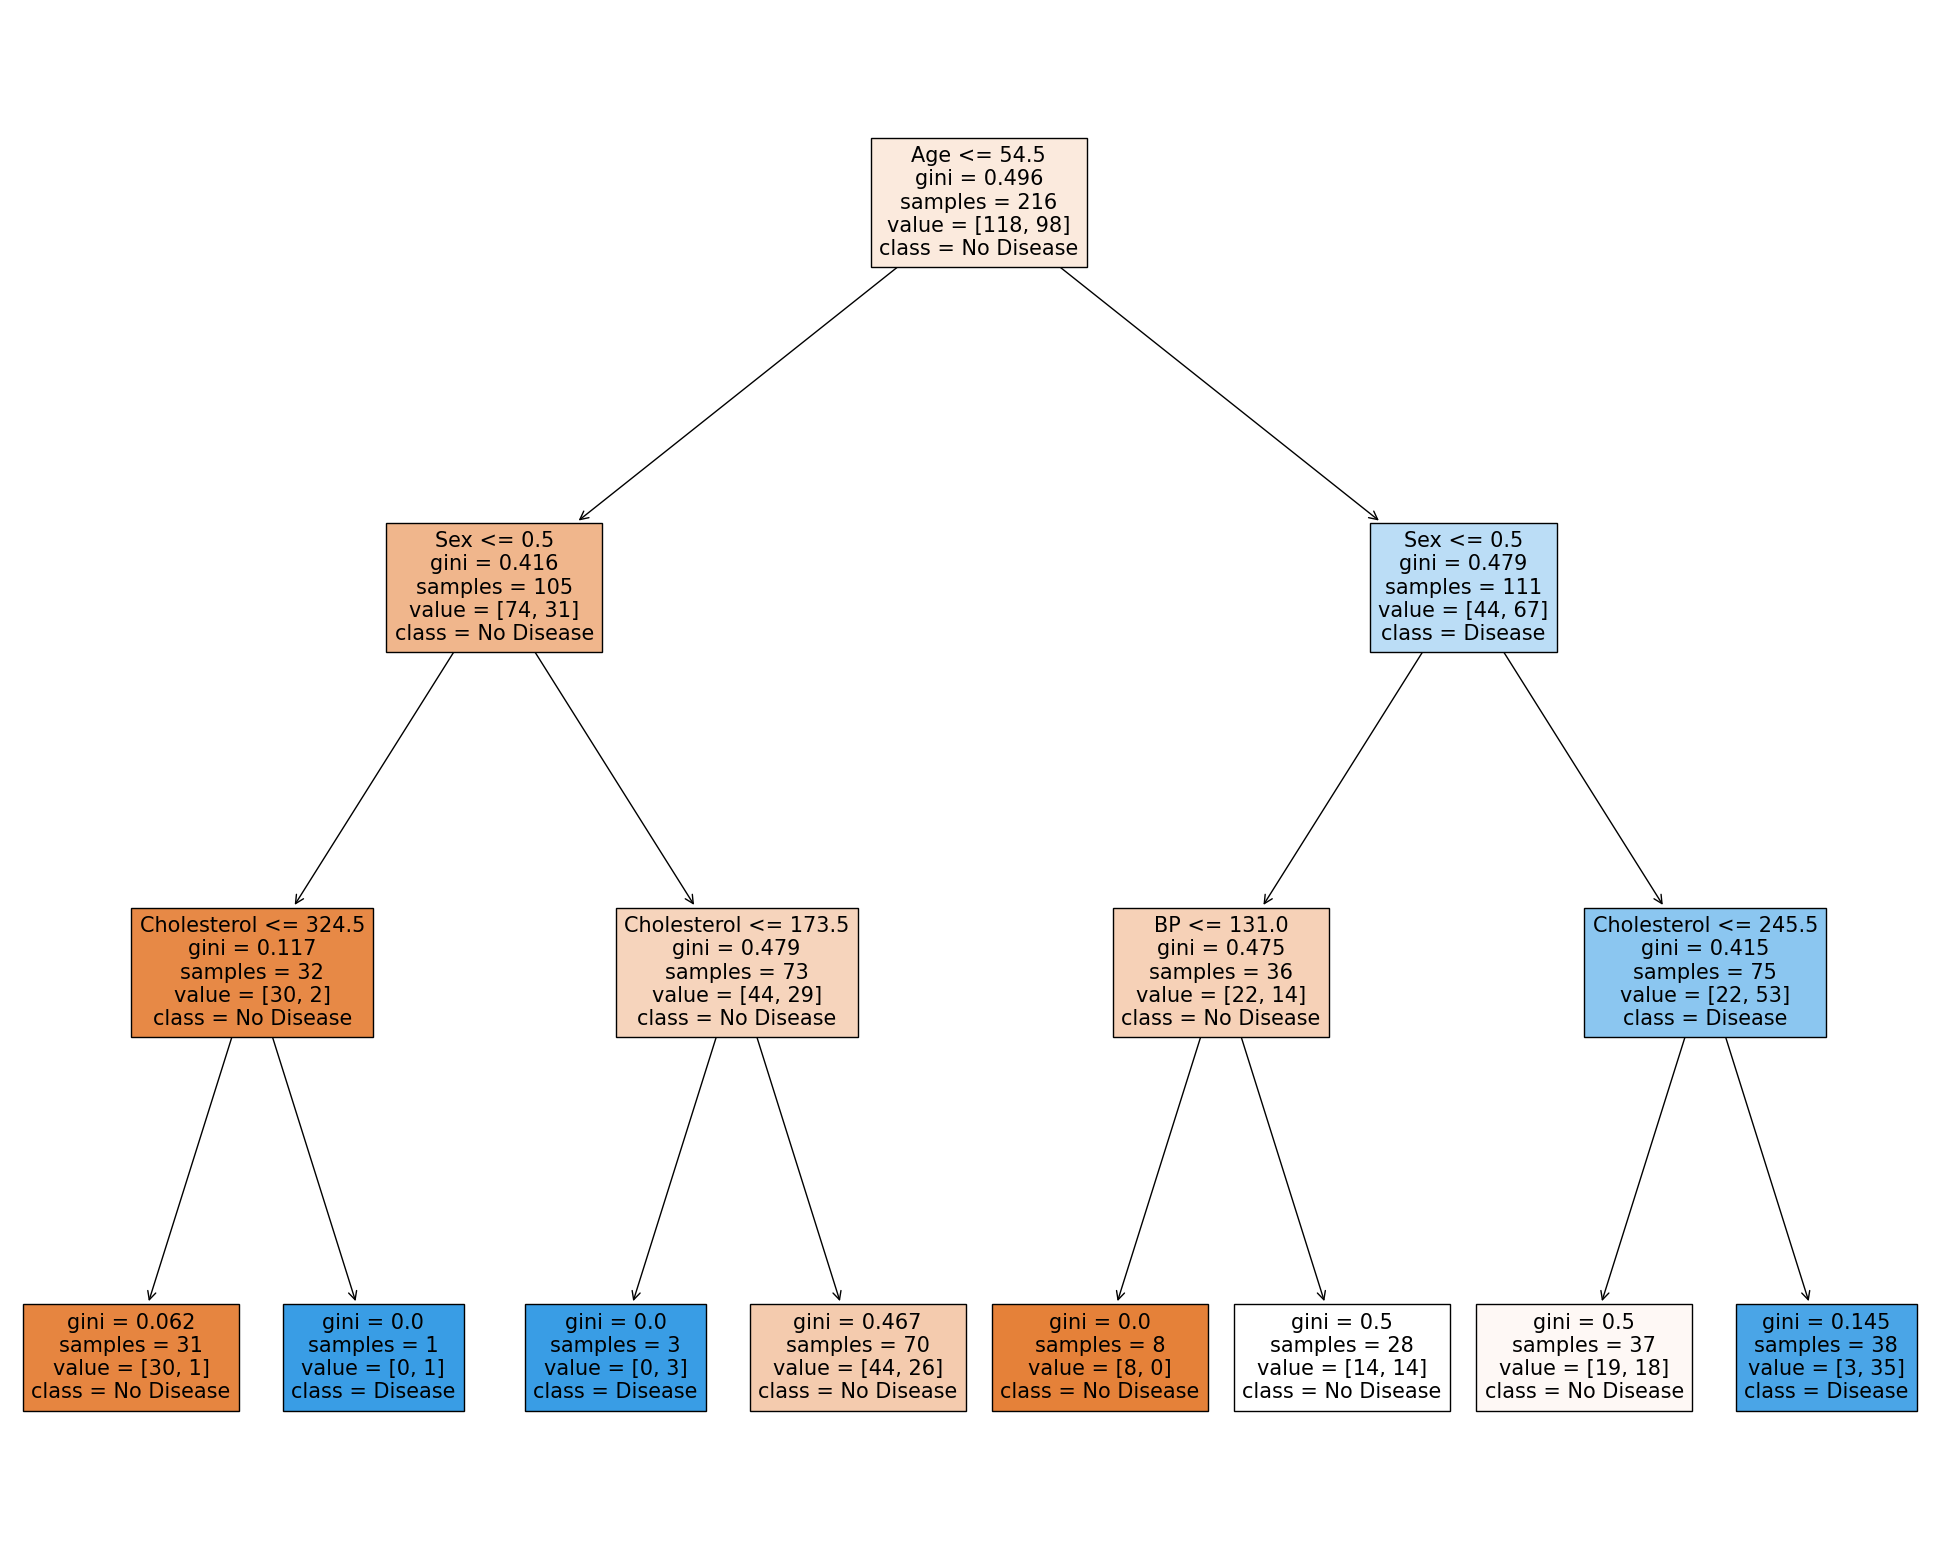

In [327]:
gph = get_dt_graph(dt)

# 1.i) min_impurity_decrease

**min_impurity_decrease**:float, default=0.0

A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:


`N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)`
                    
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

New in version 0.19.

In [328]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)

In [329]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.01)

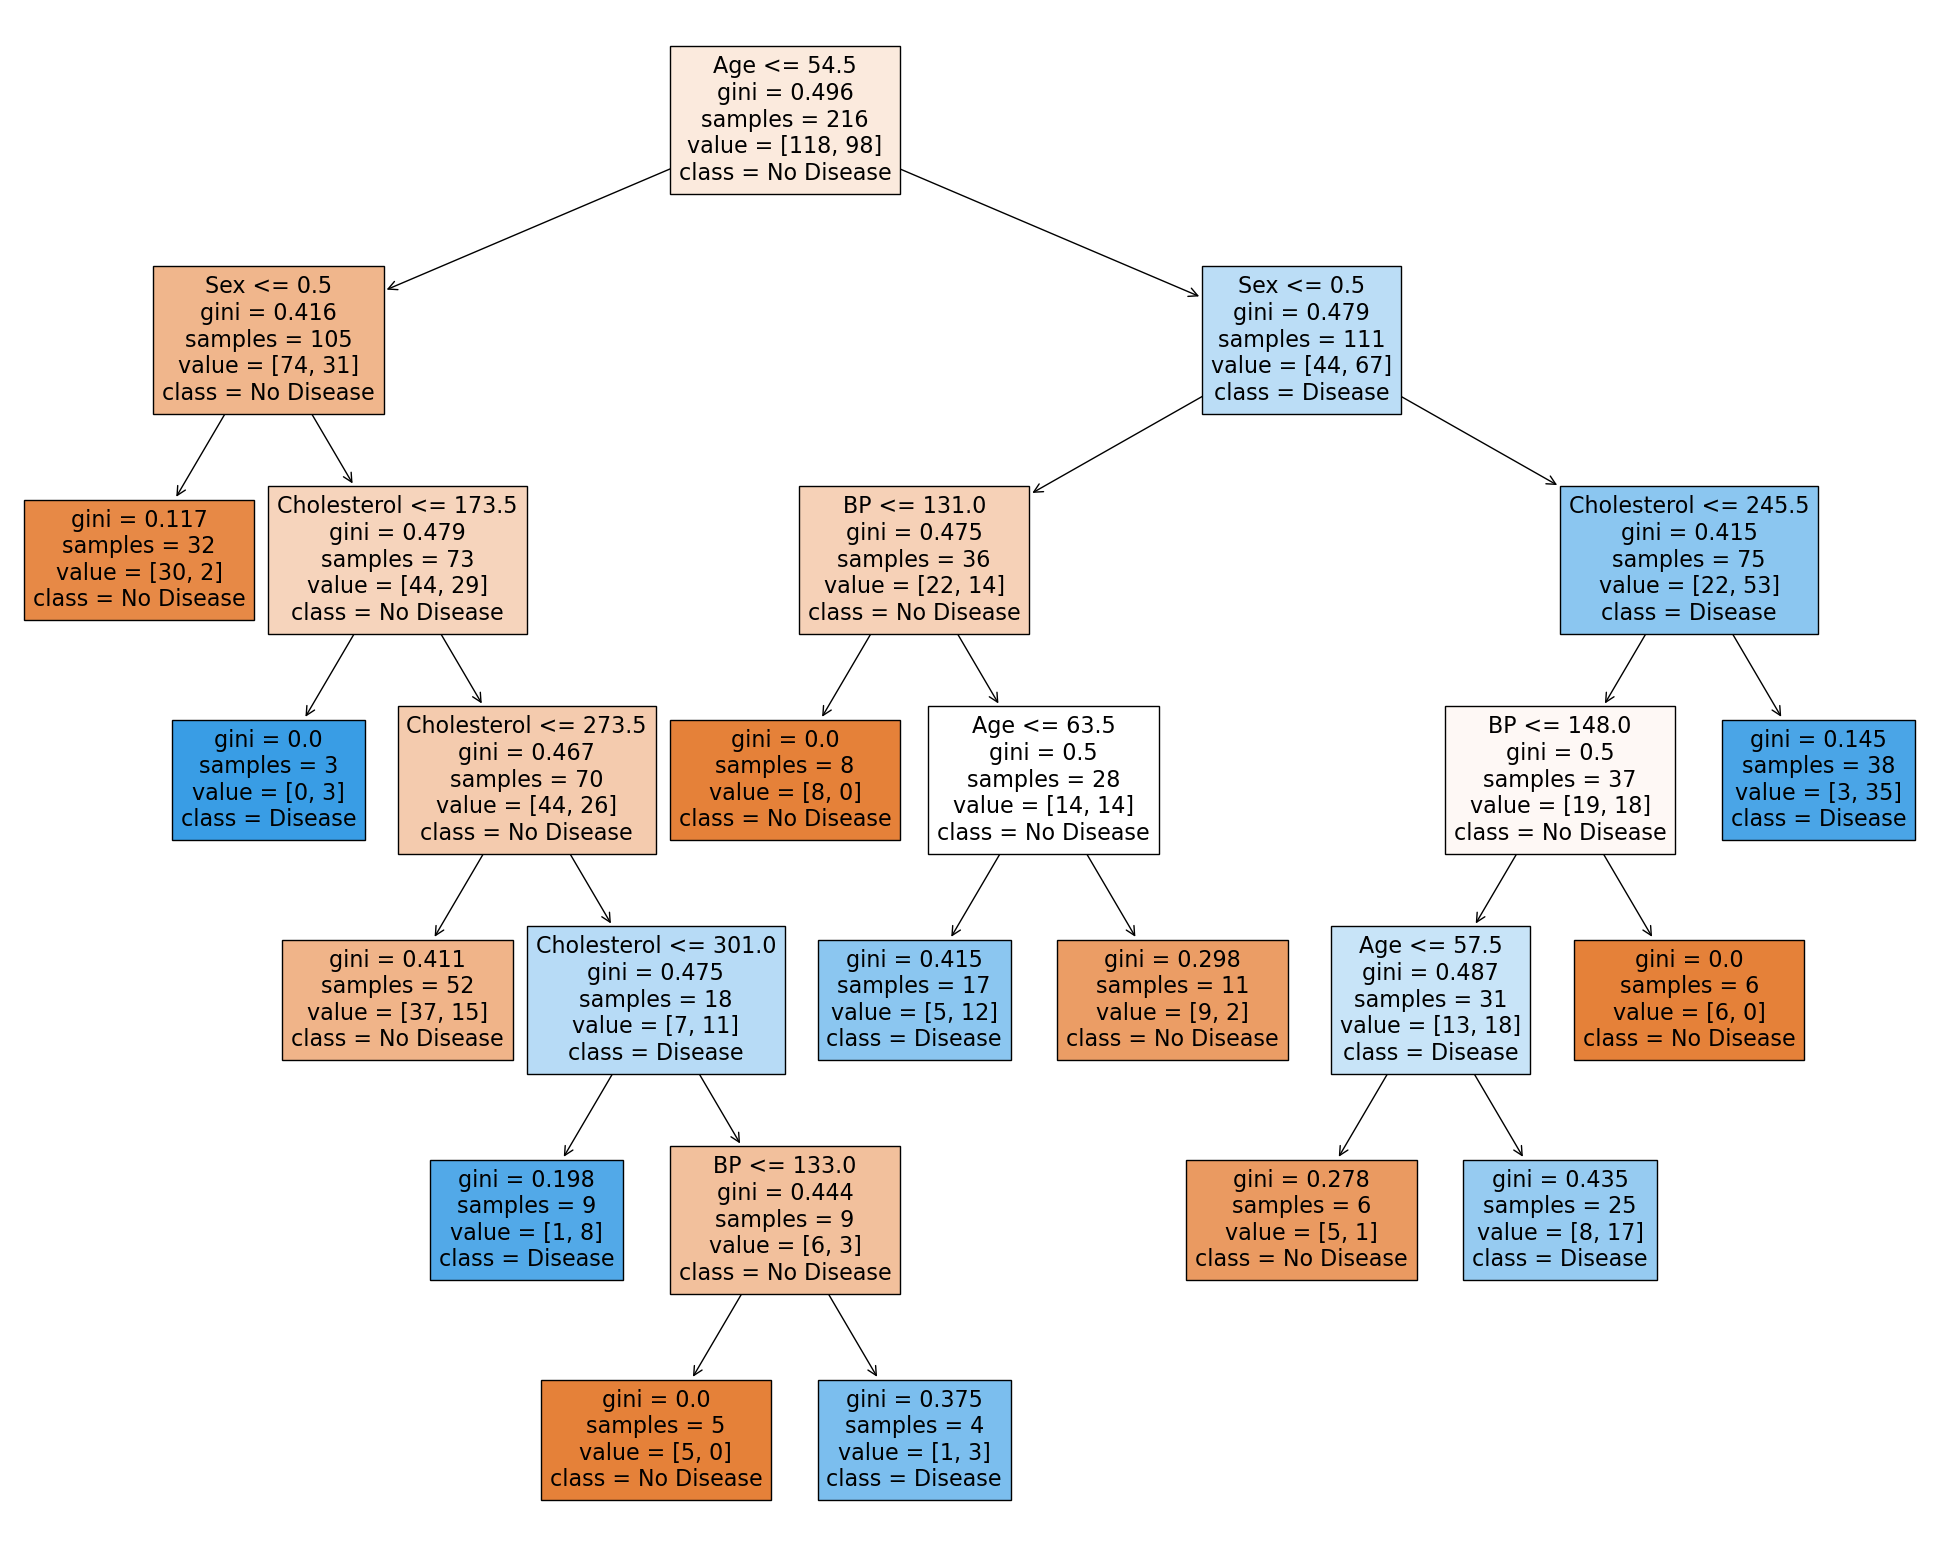

In [330]:
gph = get_dt_graph(dt)

# 2. Decision Tree Regression 

**Decision Tree Regression**

Decision Tree Regression is a machine learning algorithm used for predicting continuous numeric values in regression tasks. It constructs a tree-like model by recursively splitting the data based on feature values. The final predictions are made by averaging target values in the leaf nodes. Decision trees are interpretable, handle both numerical and categorical features, and can be prone to overfitting. Pruning techniques and hyperparameter tuning help improve their performance.

criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”  

The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

New in version 0.18: Mean Absolute Error (MAE) criterion.

New in version 0.24: Poisson deviance criterion.

In [331]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [332]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

In [333]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [334]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [335]:
df.dropna(inplace=True)

In [336]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [337]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [339]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88


In [340]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5)

In [341]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [342]:
y_pred = rt.predict(X_test)

In [343]:
r2_score(y_test,y_pred)

0.6429395711907622

# 2.1 Hyperparameter tuning

In [344]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['friedman_mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [345]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [346]:
import warnings
warnings.filterwarnings("ignore")

In [347]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [348]:
reg.best_score_

0.7406430711353812

In [349]:
reg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 0.5,
 'min_samples_split': 0.25}

## Feature Importance

In [350]:
# Feature Importance
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

RM 0.652497418414735
LSTAT 0.24317809215660574
CRIM 0.04609524974913177
TAX 0.0210134422037129
INDUS 0.020068611724477756
NOX 0.006019163877123872
DIS 0.004903663967864242
AGE 0.004513135886313394
PTRATIO 0.0017112220200353131
ZN 0.0
RAD 0.0
CHAS 0.0
B 0.0


In [351]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

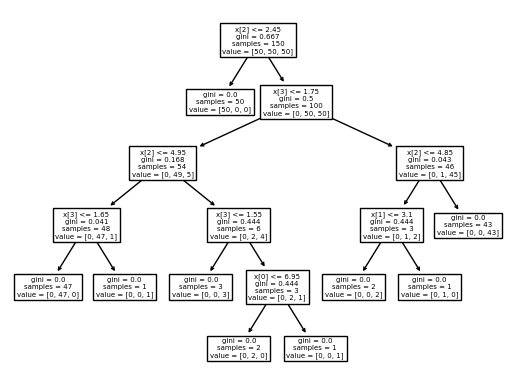

In [352]:
from sklearn.tree import plot_tree
plot_tree(clas)

In [353]:
dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.01,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Sex', 'BP', 'Cholesterol'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x790ab5517830>}

In [354]:
vars(dt)

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.01,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Sex', 'BP', 'Cholesterol'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x790ab5517830>}

In [355]:
# help(dt)

In [356]:
dir(dt)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'ma

In [357]:
# locals()

## **Thank you** for exploring this Kaggle notebook! 

## I hope you found the insights and analysis valuable for your data science journey. If you enjoyed this notebook or found it helpful, please consider giving it an "Upvote" to show your appreciation and support.

## Your feedback is essential in improving the quality of the analysis and content, so feel free to leave any comments or suggestions in the notebook's comments section. I would love to hear from you and engage in discussions about the dataset, methodology, or any other related topic.

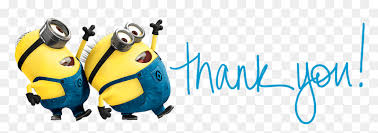